In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pmdarima as pm
import itertools
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, acf
from statsmodels.graphics.tsaplots  import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.api import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from arch import arch_model

# Data Load

In [2]:
gold = pd.read_csv('./data/gold.csv', index_col=0)
silver = pd.read_csv('./data/silver.csv', index_col=0)
platinum = pd.read_csv('./data/platinum.csv', index_col=0)

In [3]:
gold['Date'] = pd.to_datetime(gold['Date'], format = '%Y-%m-%d')
silver['Date'] = pd.to_datetime(silver['Date'], format = '%Y-%m-%d')
platinum['Date'] = pd.to_datetime(platinum['Date'], format = '%Y-%m-%d')

In [4]:
gold_price = gold.set_index(keys = 'Date')
silver_price = silver.set_index(keys = 'Date')
platinum_price = platinum.set_index(keys = 'Date')

In [5]:
gold_diff = gold_price.diff().dropna()
silver_diff = silver_price.diff().dropna()
platinum_diff = platinum_price.diff().dropna()

In [6]:
exchange = pd.read_csv('./data/exchange.csv', index_col=0)

In [7]:
exchange0 = exchange[['0']]
exchange1 = exchange[['1']]
exchange2 = exchange[['2']]
exchange3 = exchange[['3']]
exchange4 = exchange[['4']]
exchange5 = exchange[['5']]
exchange6 = exchange[['6']]
exchangeOT = exchange[['OT']]

In [8]:
exchange0.rename(columns={'0':'y'}, inplace =True)
exchange1.rename(columns={'1':'y'}, inplace =True)
exchange2.rename(columns={'2':'y'}, inplace =True)
exchange3.rename(columns={'3':'y'}, inplace =True)
exchange4.rename(columns={'4':'y'}, inplace =True)
exchange5.rename(columns={'5':'y'}, inplace =True)
exchange6.rename(columns={'6':'y'}, inplace =True)
exchangeOT.rename(columns={'OT':'y'}, inplace =True)

C:\Users\Seungyun\AppData\Local\Temp\ipykernel_21748\3491300796.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exchange0.rename(columns={'0':'y'}, inplace =True)
C:\Users\Seungyun\AppData\Local\Temp\ipykernel_21748\3491300796.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exchange1.rename(columns={'1':'y'}, inplace =True)
C:\Users\Seungyun\AppData\Local\Temp\ipykernel_21748\3491300796.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

In [9]:
exchange0_diff = exchange0['y'].diff().dropna()
exchange1_diff = exchange1['y'].diff().dropna()
exchange2_diff = exchange2['y'].diff().dropna()
exchange3_diff = exchange3['y'].diff().dropna()
exchange4_diff = exchange4['y'].diff().dropna()
exchange5_diff = exchange5['y'].diff().dropna()
exchange6_diff = exchange6['y'].diff().dropna()
exchangeOT_diff = exchangeOT['y'].diff().dropna()

# Data Analysis

In [10]:
#ADF

def ADF(data):
    
    result = adfuller(data, autolag = 'AIC')
    
    print('-----ADF-----')
    print('ADF Statistic: %f' % result[0])
    print('p-value: %1.10f' % result[1])
    print('Lag: %d' % result[2])
    print('observation: %d' % result[3])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key,value))

Gold Price
             Price
count  1290.000000
mean   1501.741550
std     254.202298
min    1162.000000
25%    1278.525000
50%    1411.600000
75%    1774.575000
max    2069.400000

Gold Price Differencing
             Price
count  1289.000000
mean      0.517145
std      14.645796
min     -97.300000
25%      -5.100000
50%       0.800000
75%       7.000000
max      93.200000


<Figure size 1200x600 with 0 Axes>

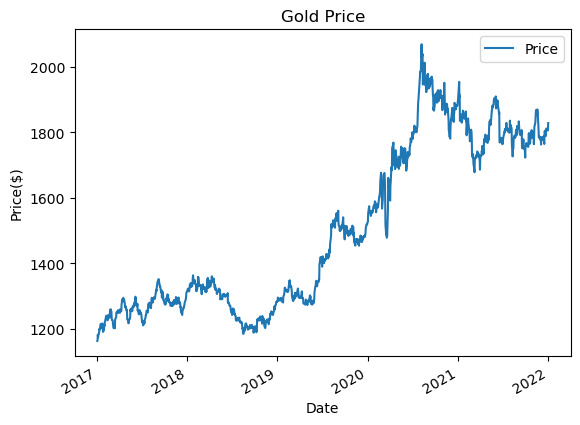

<Figure size 2000x600 with 0 Axes>

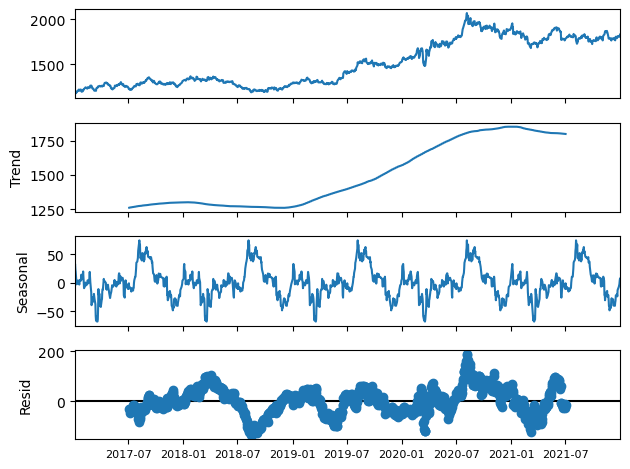

<Figure size 1200x600 with 0 Axes>

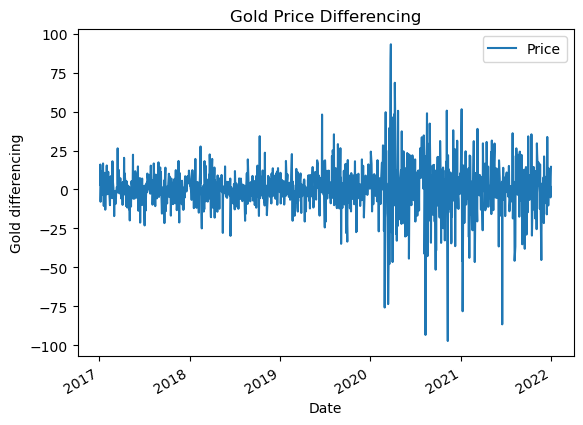

<Figure size 2000x600 with 0 Axes>

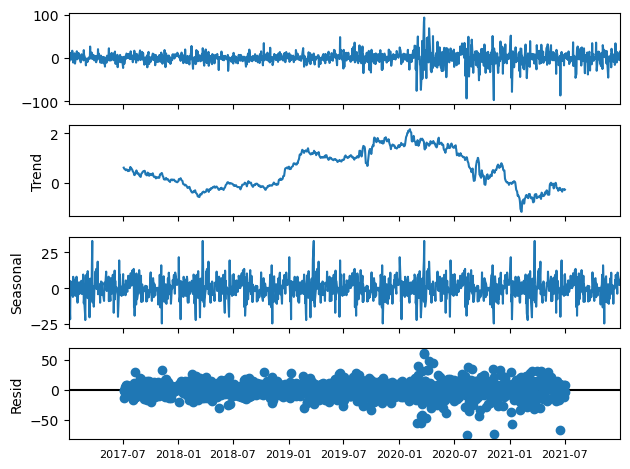

-----ADF-----
ADF Statistic: -0.806442
p-value: 0.8172225725
Lag: 6
observation: 1283
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
None
-----ADF-----
ADF Statistic: -17.368823
p-value: 0.0000000000
Lag: 5
observation: 1283
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
None


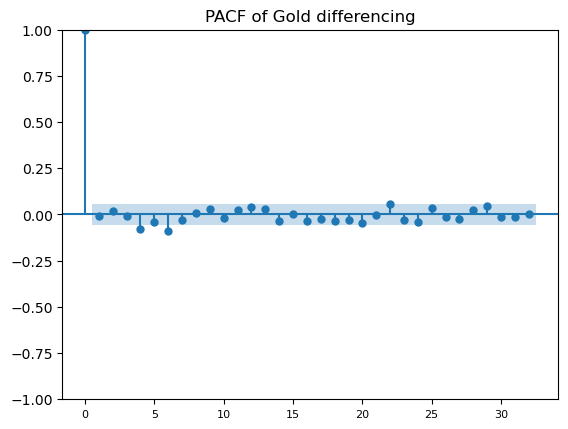

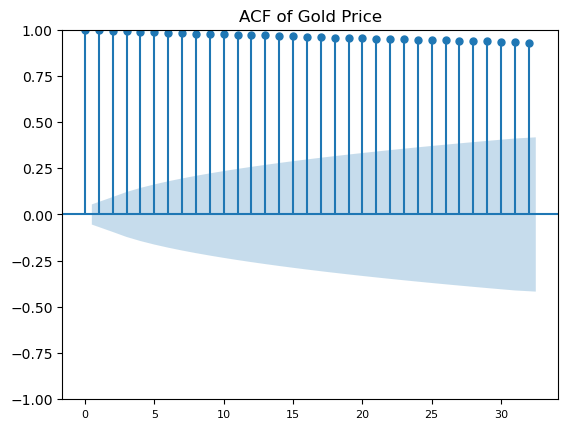

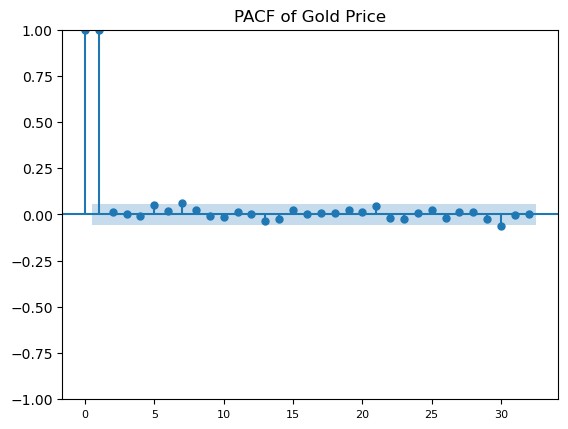

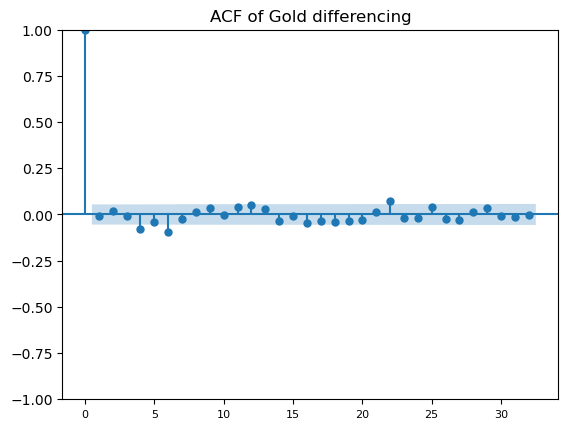

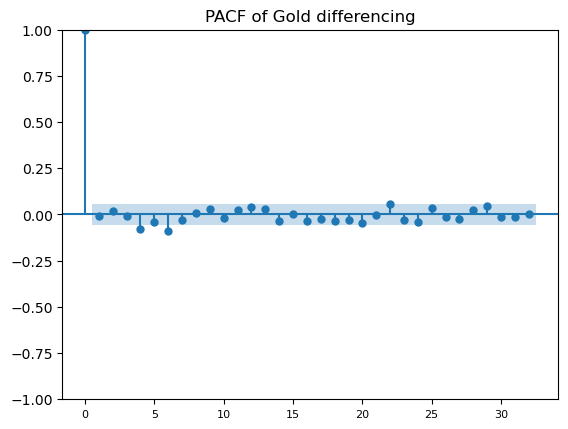

In [11]:
print('Gold Price')
print(gold_price.describe())
print()
print('Gold Price Differencing')
print(gold_diff.describe())

#Plot
plt.figure(figsize=(12,6))
plt.rc('xtick', labelsize= 10)
gold_price.plot(kind='line')
plt.ylabel('Price($)')
plt.title('Gold Price')
plt.show()

#Decompose  ##multiplicative check
plt.figure(figsize=(20,6))
plt.rc('xtick', labelsize= 8)
gold_decomp = seasonal_decompose(gold_price, model = 'additive',  period = 258)
gold_decomp.plot()
plt.show()

#Plot
plt.figure(figsize=(12,6))
plt.rc('xtick', labelsize= 10)
gold_diff.plot(kind='line')
plt.ylabel('Gold differencing')
plt.title('Gold Price Differencing')
plt.show()

#Decompose
plt.figure(figsize=(20,6))
plt.rc('xtick', labelsize= 8)
gold_diff_decomp = seasonal_decompose(gold_diff, model = 'additive', period = 258)
gold_diff_decomp.plot()
plt.show()

#ADF
print(ADF(gold_price))
print(ADF(gold_diff))

#ACF,PACF
plot_acf(gold_price,title = 'ACF of Gold Price')
plot_pacf(gold_price, title = 'PACF of Gold Price')
plot_acf(gold_diff, title = 'ACF of Gold differencing')
plot_pacf(gold_diff, title = 'PACF of Gold differencing')

Silver Price
             Price
count  1280.000000
mean     18.938000
std       4.197287
min      11.770000
25%      16.032500
50%      17.150000
75%      23.095000
max      29.420000

Silver Price Differencing
             Price
count  1279.000000
mean      0.005426
std       0.387319
min      -3.210000
25%      -0.120000
50%       0.000000
75%       0.140000
max       2.510000


<Figure size 1200x600 with 0 Axes>

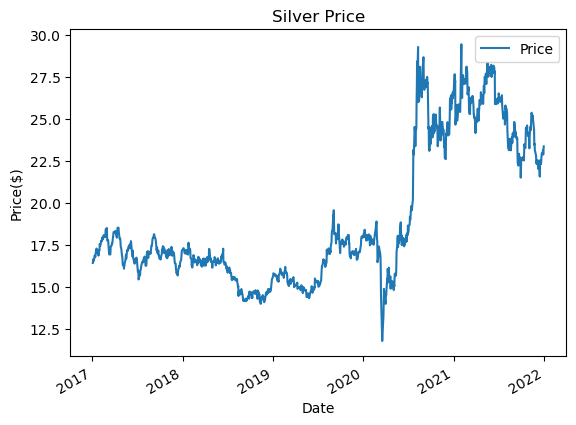

<Figure size 2000x600 with 0 Axes>

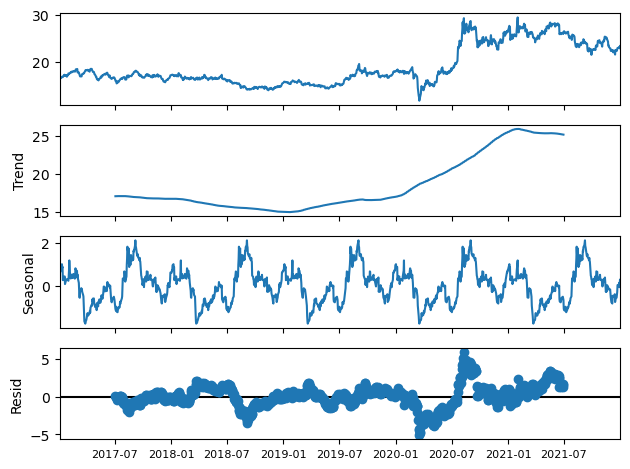

<Figure size 1200x600 with 0 Axes>

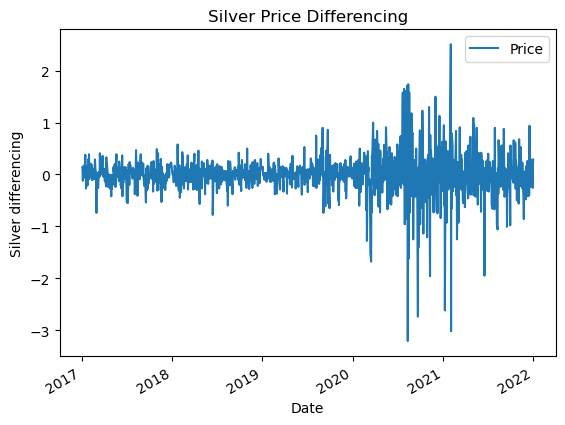

<Figure size 2000x600 with 0 Axes>

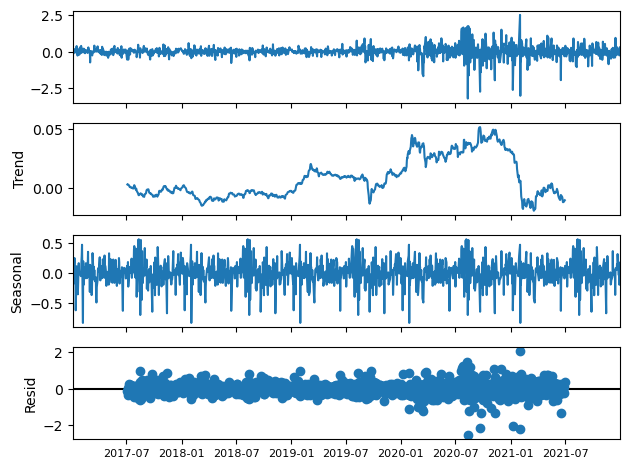

-----ADF-----
ADF Statistic: -1.380636
p-value: 0.5915234301
Lag: 16
observation: 1263
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568
None
-----ADF-----
ADF Statistic: -8.479066
p-value: 0.0000000000
Lag: 15
observation: 1263
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568
None


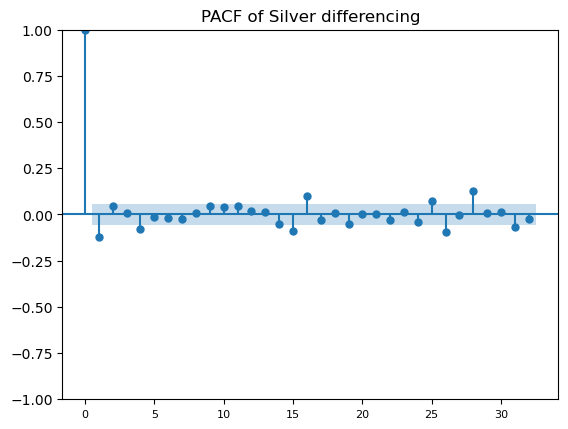

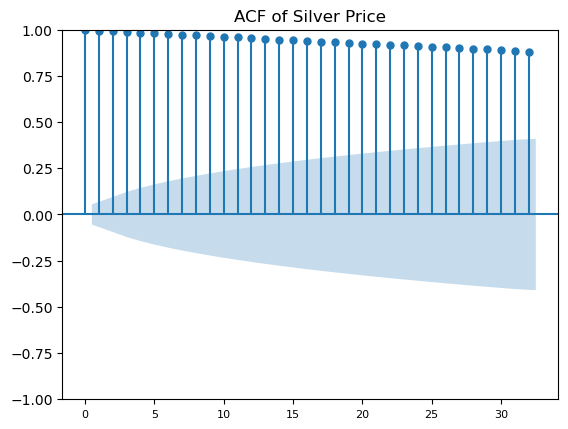

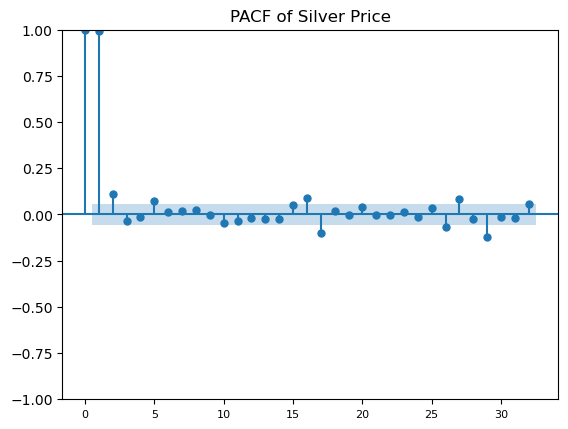

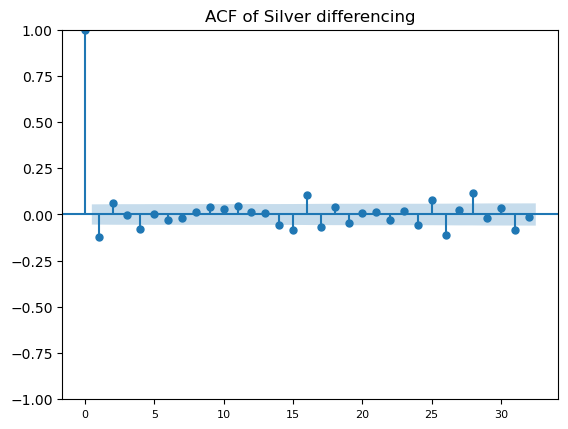

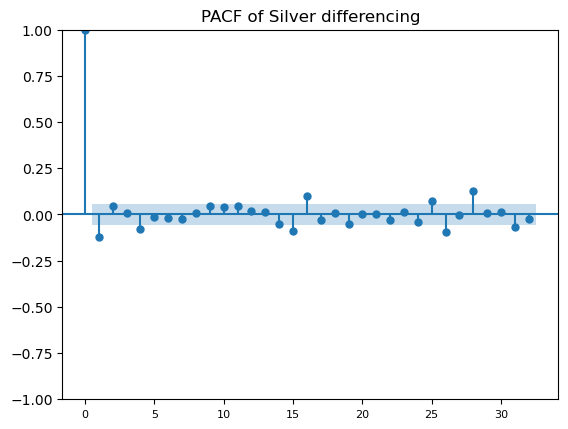

In [12]:
print('Silver Price')
print(silver_price.describe())
print()
print('Silver Price Differencing')
print(silver_diff.describe())

#Plot
plt.figure(figsize=(12,6))
plt.rc('xtick', labelsize= 10)
silver_price.plot(kind='line')
plt.ylabel('Price($)')
plt.title('Silver Price')
plt.show()

#Decompose
plt.figure(figsize=(20,6))
plt.rc('xtick', labelsize= 8)
silver_decomp = seasonal_decompose(silver_price, model = 'additive', period = 256)
silver_decomp.plot()
plt.show()

#Plot
plt.figure(figsize=(12,6))
plt.rc('xtick', labelsize= 10)
silver_diff.plot(kind='line')
plt.ylabel('Silver differencing')
plt.title('Silver Price Differencing')
plt.show()

#Decompose
plt.figure(figsize=(20,6))
plt.rc('xtick', labelsize= 8)
silver_diff_decomp = seasonal_decompose(silver_diff, model = 'additive', period = 256)
silver_diff_decomp.plot()
plt.show()

#ADF
print(ADF(silver_price))
print(ADF(silver_diff))

#ACF,PACF
plot_acf(silver_price, title = 'ACF of Silver Price')
plot_pacf(silver_price, title = 'PACF of Silver Price')
plot_acf(silver_diff, title = 'ACF of Silver differencing')
plot_pacf(silver_diff, title = 'PACF of Silver differencing')

Platinum Price
             Price
count  1557.000000
mean    937.764804
std     110.629828
min     595.200000
25%     856.800000
50%     930.050000
75%     986.050000
max    1318.750000

Platinum Price Differencing
             Price
count  1556.000000
mean      0.038303
std      14.353192
min    -100.550000
25%      -6.262500
50%       0.500000
75%       7.050000
max      69.450000


<Figure size 1200x600 with 0 Axes>

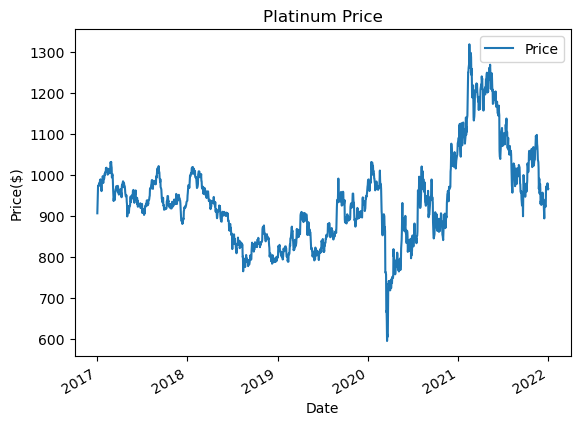

<Figure size 2000x600 with 0 Axes>

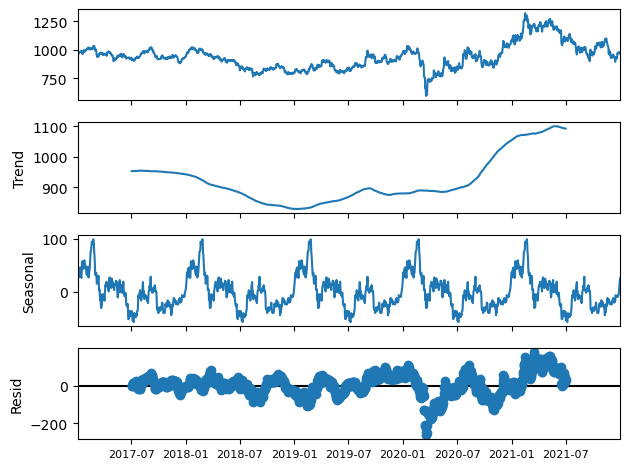

<Figure size 1200x600 with 0 Axes>

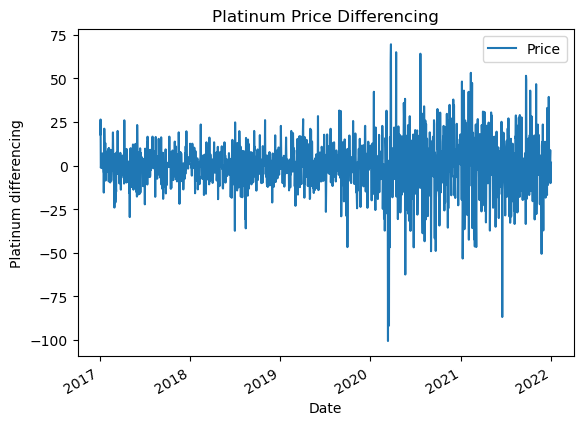

<Figure size 2000x600 with 0 Axes>

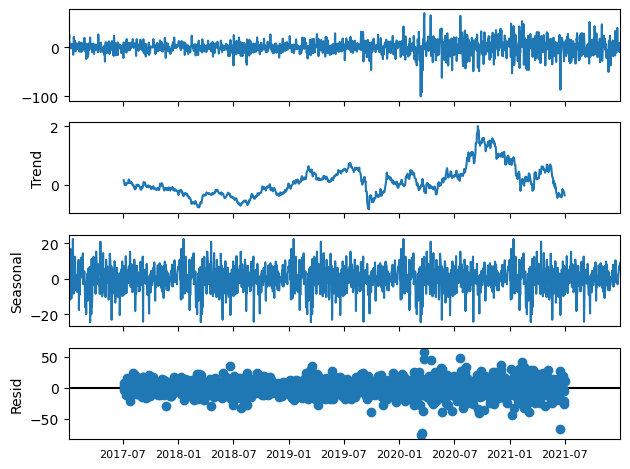

-----ADF-----
ADF Statistic: -2.563174
p-value: 0.1008497353
Lag: 0
observation: 1556
Critical Values:
	1%: -3.435
	5%: -2.863
	10%: -2.568
None
-----ADF-----
ADF Statistic: -14.583203
p-value: 0.0000000000
Lag: 9
observation: 1546
Critical Values:
	1%: -3.435
	5%: -2.863
	10%: -2.568
None


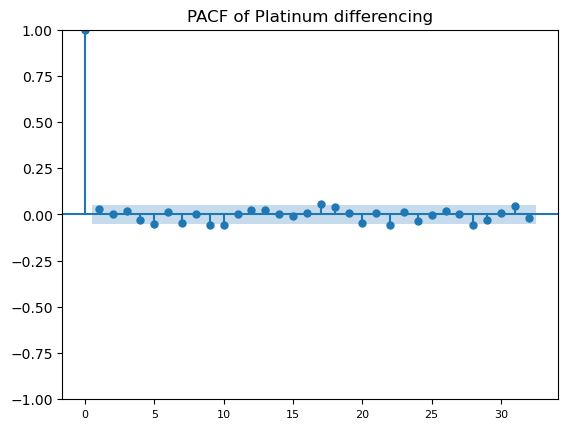

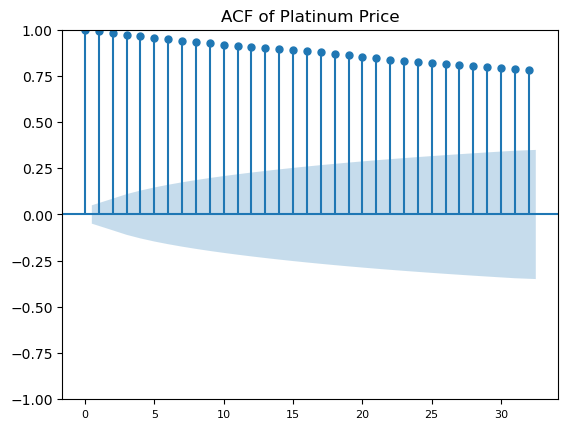

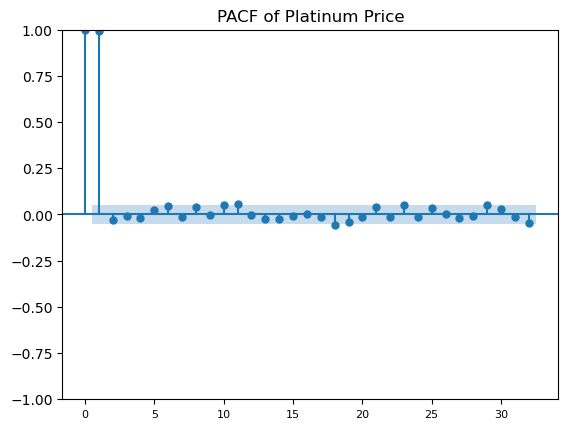

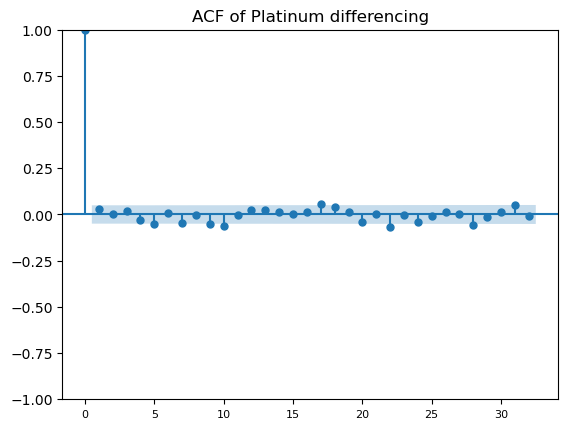

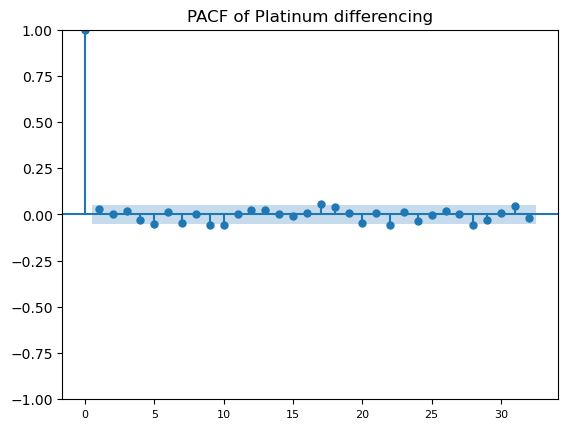

In [13]:
print('Platinum Price')
print(platinum_price.describe())
print()
print('Platinum Price Differencing')
print(platinum_diff.describe())

#Plot
plt.figure(figsize=(12,6))
plt.rc('xtick', labelsize= 10)
platinum_price.plot(kind='line')
plt.ylabel('Price($)')
plt.title('Platinum Price')
plt.show()

#Decompose
plt.figure(figsize=(20,6))
plt.rc('xtick', labelsize= 8)
platinum_decomp = seasonal_decompose(platinum_price, model = 'additive', period = 311)
platinum_decomp.plot()
plt.show()

#Plot
plt.figure(figsize=(12,6))
plt.rc('xtick', labelsize= 10)
platinum_diff.plot(kind='line')
plt.ylabel('Platinum differencing')
plt.title('Platinum Price Differencing')
plt.show()

#Decompose
plt.figure(figsize=(20,6))
plt.rc('xtick', labelsize= 8)
platinum_diff_decomp = seasonal_decompose(platinum_diff, model = 'additive', period = 311)
platinum_diff_decomp.plot()
plt.show()

#ADF
print(ADF(platinum_price))
print(ADF(platinum_diff))

#ACF,PACF
plot_acf(platinum_price,title = 'ACF of Platinum Price')
plot_pacf(platinum_price, title = 'PACF of Platinum Price')
plot_acf(platinum_diff, title = 'ACF of Platinum differencing')
plot_pacf(platinum_diff, title = 'PACF of Platinum differencing')

Exchange 0
                 y
count  7588.000000
mean      0.776974
std       0.136620
min       0.483297
25%       0.701422
50%       0.761377
75%       0.873477
max       1.102536

Exchange 0 Differencing
count    7587.000000
mean       -0.000009
std         0.006049
min        -0.150073
25%        -0.002400
50%         0.000000
75%         0.002500
max         0.151362
Name: y, dtype: float64


<Figure size 1200x600 with 0 Axes>

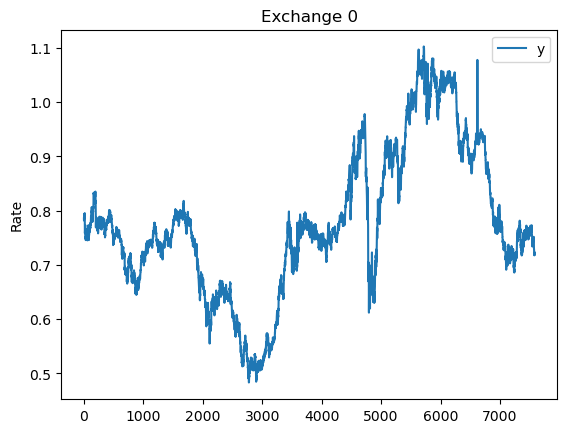

<Figure size 2000x600 with 0 Axes>

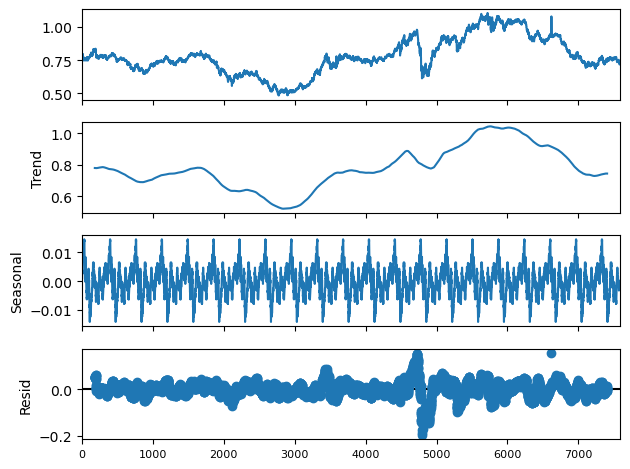

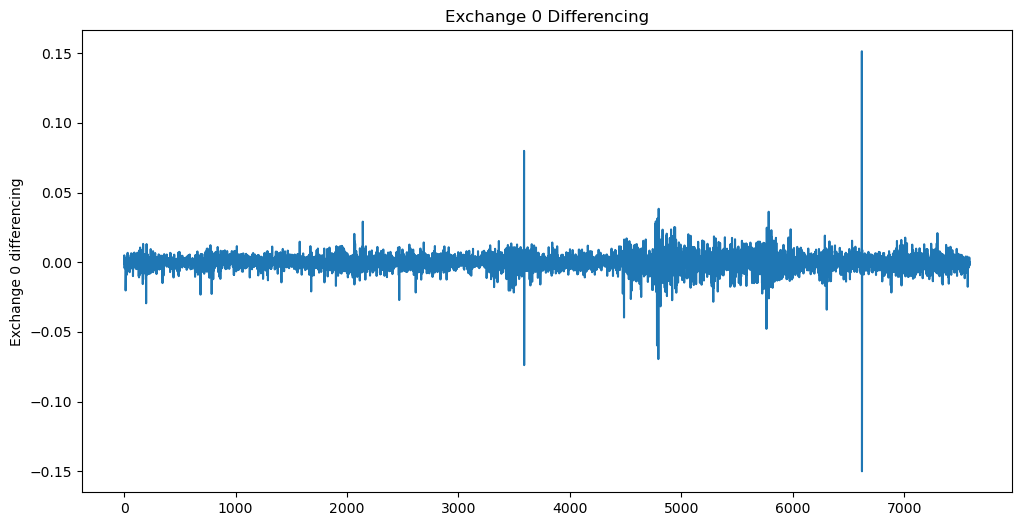

<Figure size 2000x600 with 0 Axes>

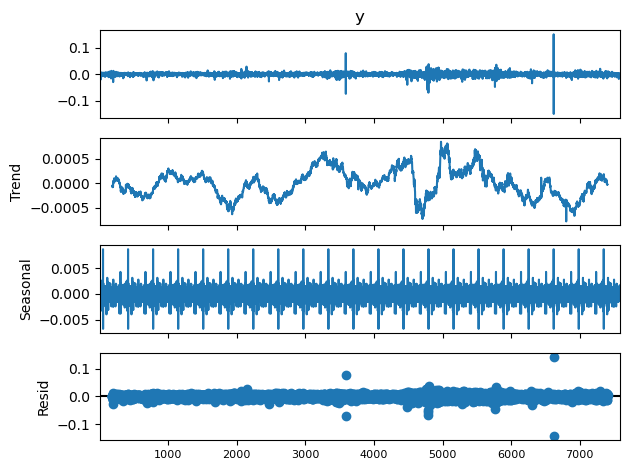

-----ADF-----
ADF Statistic: -1.664994
p-value: 0.4492327354
Lag: 1
observation: 7586
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
None
-----ADF-----
ADF Statistic: -99.393431
p-value: 0.0000000000
Lag: 0
observation: 7586
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
None


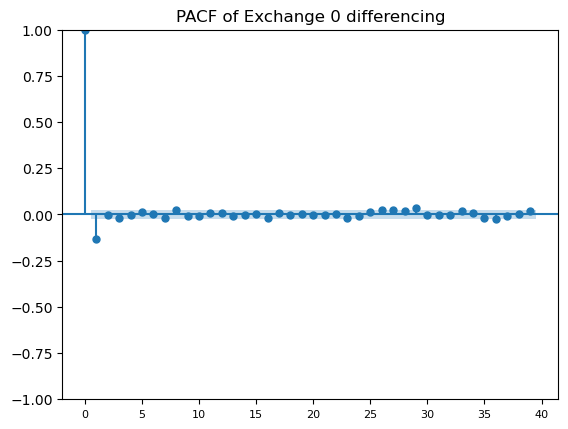

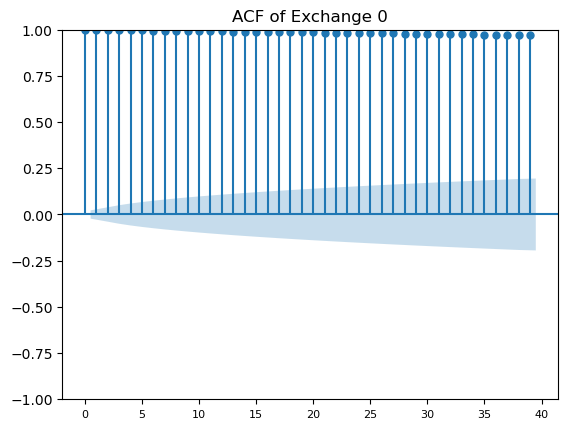

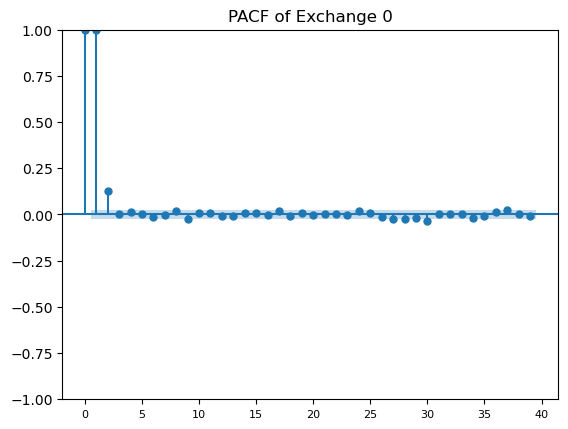

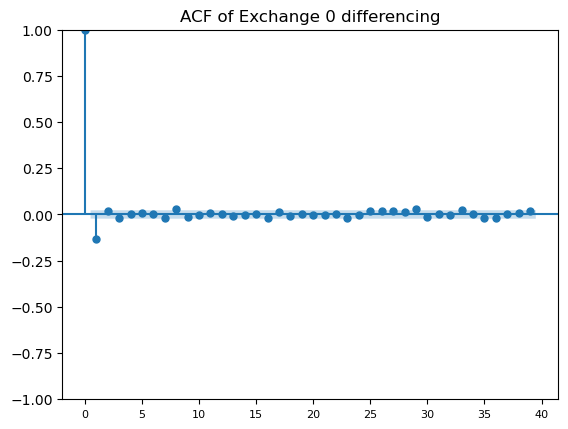

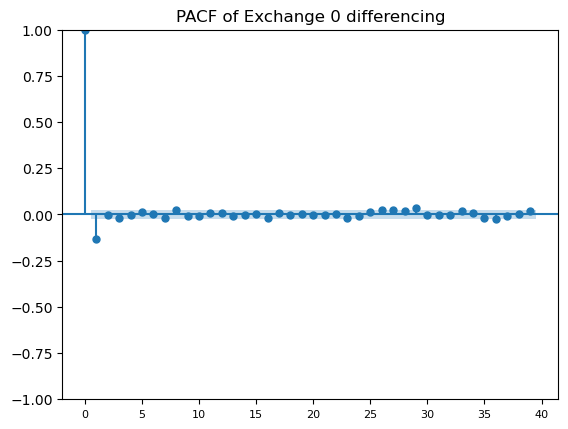

In [14]:
print('Exchange 0')
print(exchange0.describe())
print()
print('Exchange 0 Differencing')
print(exchange0_diff.describe())

#Plot
plt.figure(figsize=(12,6))
plt.rc('xtick', labelsize= 10)
exchange0.plot(kind='line')
plt.ylabel('Rate')
plt.title('Exchange 0')
plt.show()

#Decompose  ##multiplicative check
plt.figure(figsize=(20,6))
plt.rc('xtick', labelsize= 8)
exchange0_decomp = seasonal_decompose(exchange0, model = 'additive',  period = 365)
exchange0_decomp.plot()
plt.show()

#Plot
plt.figure(figsize=(12,6))
plt.rc('xtick', labelsize= 10)
exchange0_diff.plot(kind='line')
plt.ylabel('Exchange 0 differencing')
plt.title('Exchange 0 Differencing')
plt.show()

#Decompose
plt.figure(figsize=(20,6))
plt.rc('xtick', labelsize= 8)
exchange0_diff_decomp = seasonal_decompose(exchange0_diff, model = 'additive', period = 365)
exchange0_diff_decomp.plot()
plt.show()

#ADF
print(ADF(exchange0))
print(ADF(exchange0_diff))

#ACF,PACF
plot_acf(exchange0,title = 'ACF of Exchange 0')
plot_pacf(exchange0, title = 'PACF of Exchange 0')
plot_acf(exchange0_diff, title = 'ACF of Exchange 0 differencing')
plot_pacf(exchange0_diff, title = 'PACF of Exchange 0 differencing')

Exchange 1
                 y
count  7588.000000
mean      1.634105
std       0.161544
min       1.211534
25%       1.532887
50%       1.606574
75%       1.707646
max       2.109000

Exchange 1 Differencing
count    7587.000000
mean       -0.000050
std         0.010037
min        -0.188468
25%        -0.004300
50%         0.000000
75%         0.004579
max         0.192868
Name: y, dtype: float64


<Figure size 1200x600 with 0 Axes>

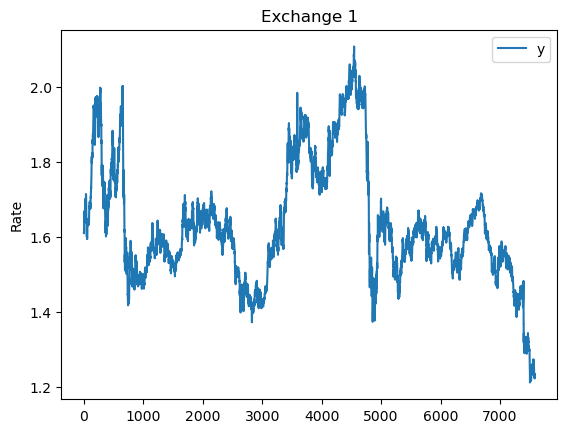

<Figure size 2000x600 with 0 Axes>

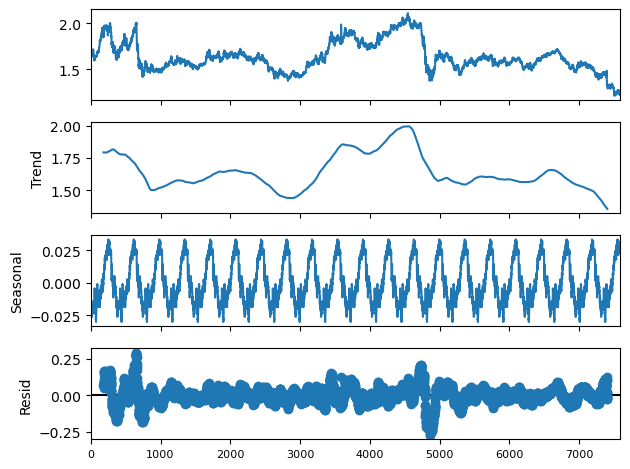

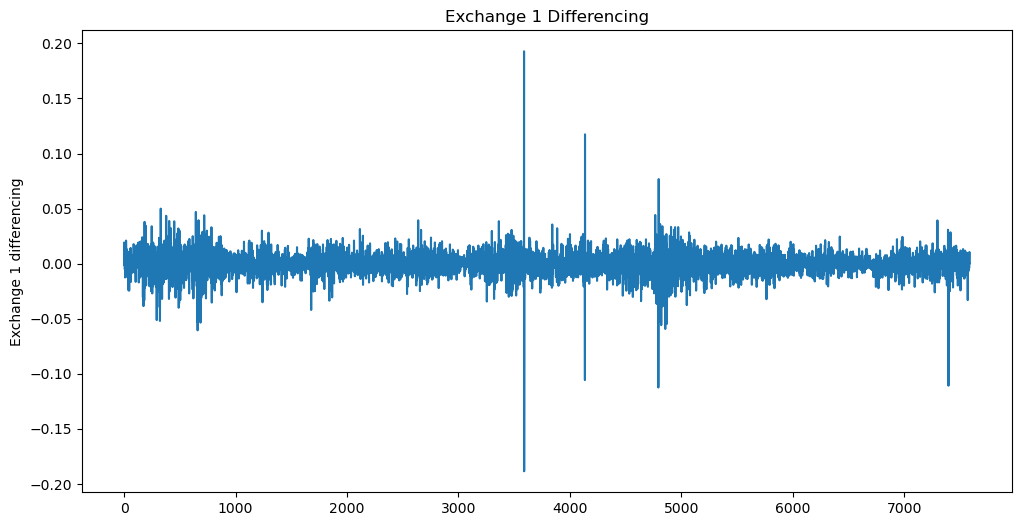

<Figure size 2000x600 with 0 Axes>

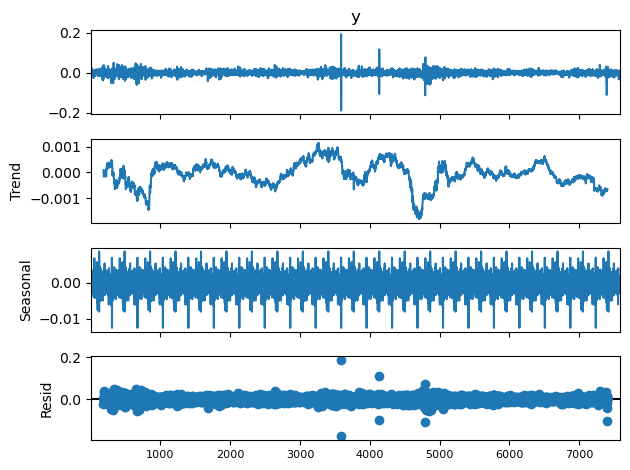

-----ADF-----
ADF Statistic: -2.149718
p-value: 0.2249980637
Lag: 14
observation: 7573
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
None
-----ADF-----
ADF Statistic: -22.636334
p-value: 0.0000000000
Lag: 13
observation: 7573
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
None


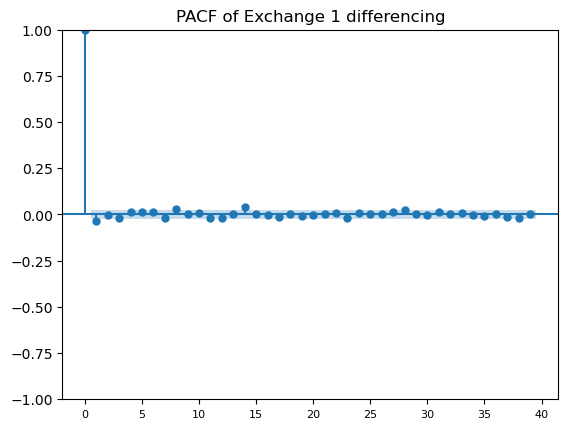

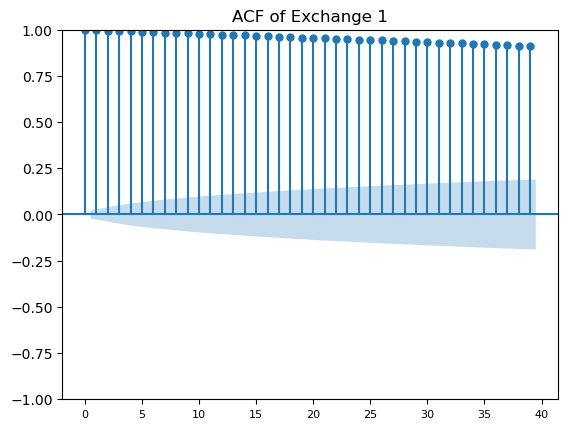

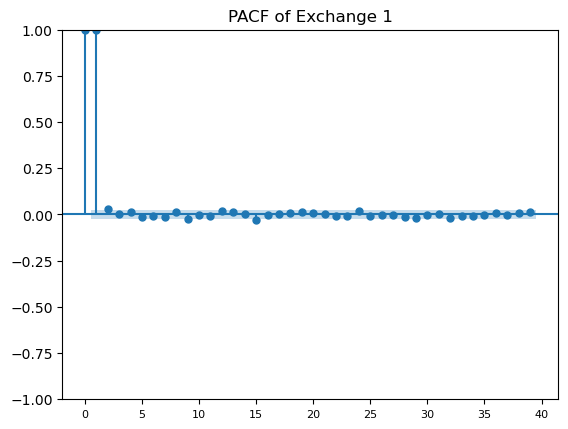

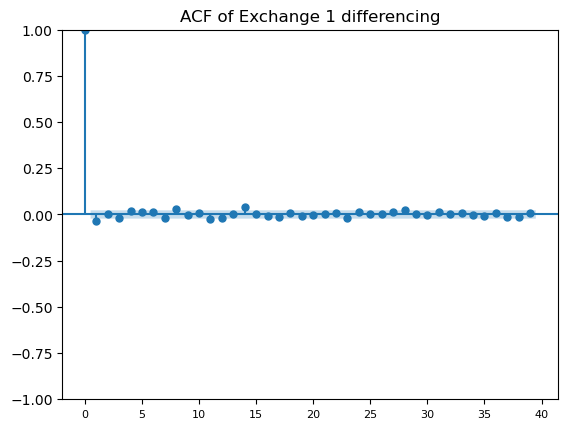

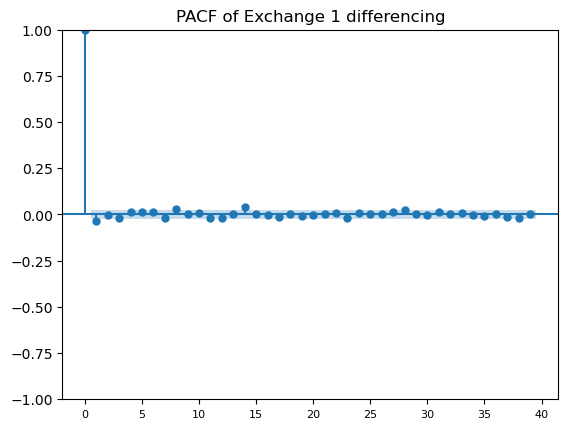

In [15]:
print('Exchange 1')
print(exchange1.describe())
print()
print('Exchange 1 Differencing')
print(exchange1_diff.describe())

#Plot
plt.figure(figsize=(12,6))
plt.rc('xtick', labelsize= 10)
exchange1.plot(kind='line')
plt.ylabel('Rate')
plt.title('Exchange 1')
plt.show()

#Decompose  ##multiplicative check
plt.figure(figsize=(20,6))
plt.rc('xtick', labelsize= 8)
exchange1_decomp = seasonal_decompose(exchange1, model = 'additive',  period = 365)
exchange1_decomp.plot()
plt.show()

#Plot
plt.figure(figsize=(12,6))
plt.rc('xtick', labelsize= 10)
exchange1_diff.plot(kind='line')
plt.ylabel('Exchange 1 differencing')
plt.title('Exchange 1 Differencing')
plt.show()

#Decompose
plt.figure(figsize=(20,6))
plt.rc('xtick', labelsize= 8)
exchange1_diff_decomp = seasonal_decompose(exchange1_diff, model = 'additive', period = 365)
exchange1_diff_decomp.plot()
plt.show()

#ADF
print(ADF(exchange1))
print(ADF(exchange1_diff))

#ACF,PACF
plot_acf(exchange1,title = 'ACF of Exchange 1')
plot_pacf(exchange1, title = 'PACF of Exchange 1')
plot_acf(exchange1_diff, title = 'ACF of Exchange 1 differencing')
plot_pacf(exchange1_diff, title = 'PACF of Exchange 1 differencing')

Exchange 2
                 y
count  7588.000000
mean      0.821811
std       0.117123
min       0.618582
25%       0.727901
50%       0.811582
75%       0.920394
max       1.091524

Exchange 2 Differencing
count    7587.000000
mean       -0.000015
std         0.004486
min        -0.088299
25%        -0.001636
50%         0.000000
75%         0.001653
max         0.091646
Name: y, dtype: float64


<Figure size 1200x600 with 0 Axes>

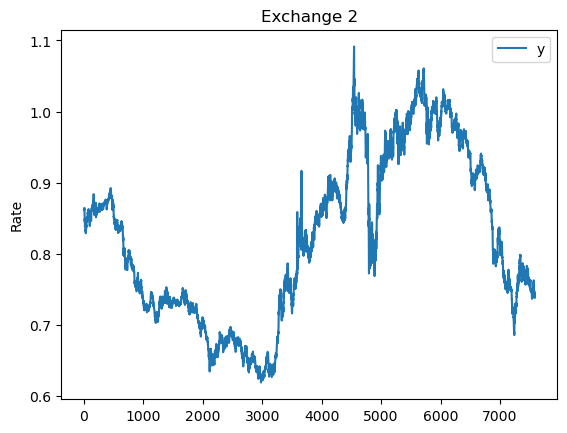

<Figure size 2000x600 with 0 Axes>

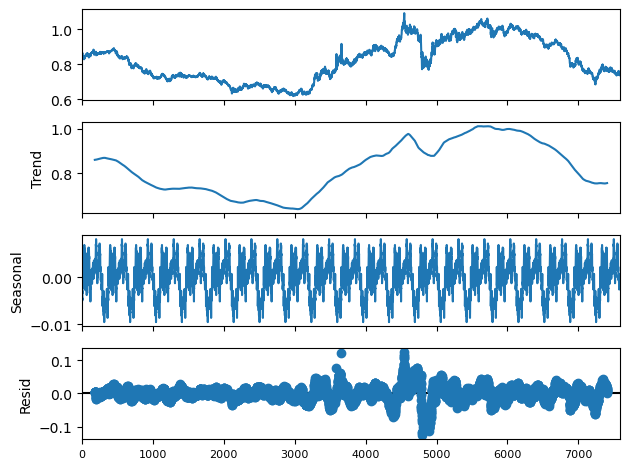

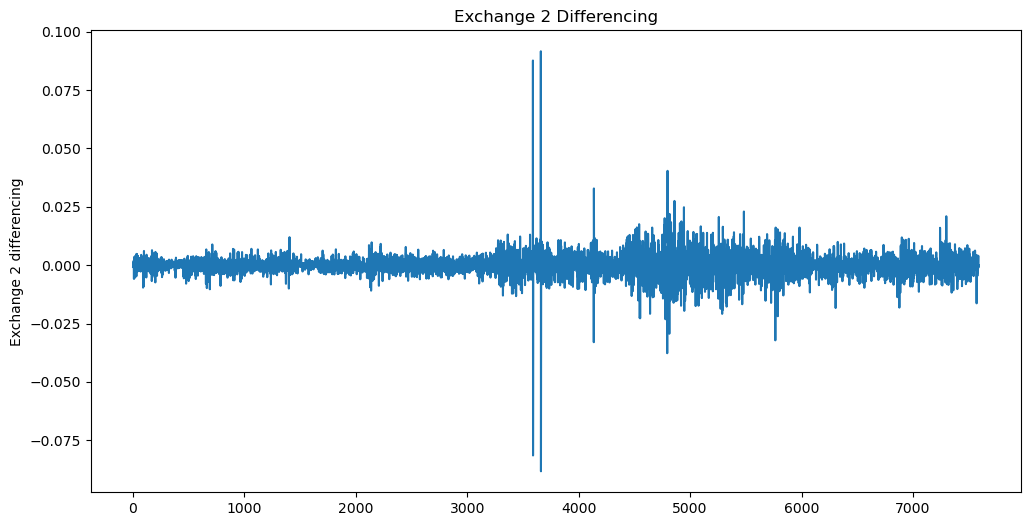

<Figure size 2000x600 with 0 Axes>

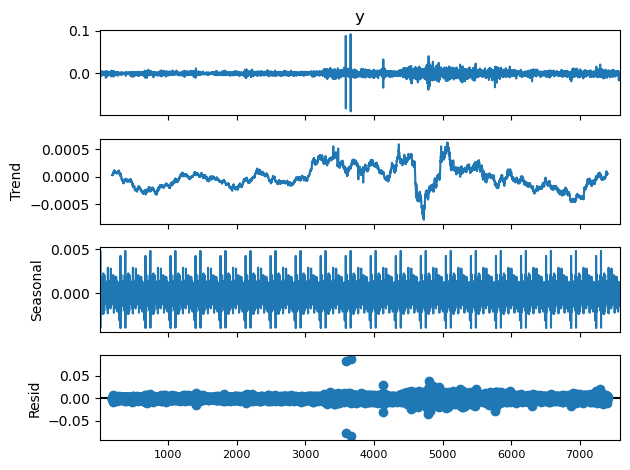

-----ADF-----
ADF Statistic: -1.352572
p-value: 0.6047908050
Lag: 7
observation: 7580
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
None
-----ADF-----
ADF Statistic: -35.296871
p-value: 0.0000000000
Lag: 6
observation: 7580
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
None


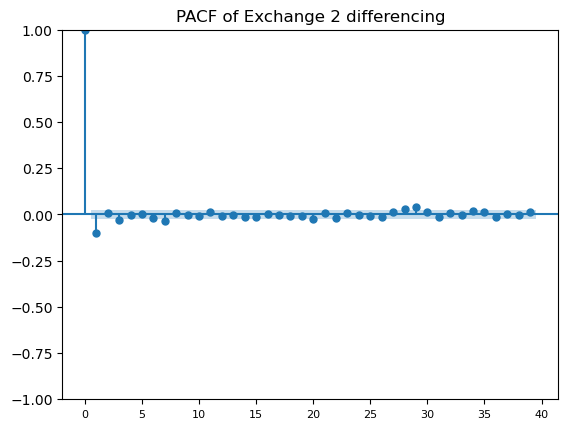

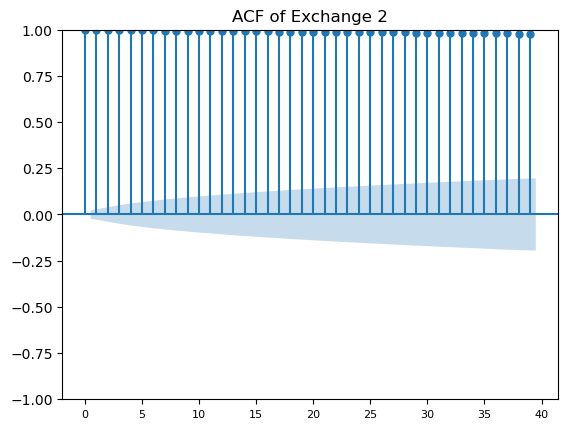

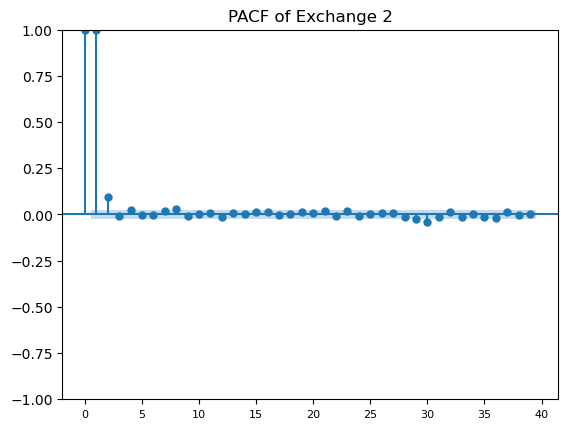

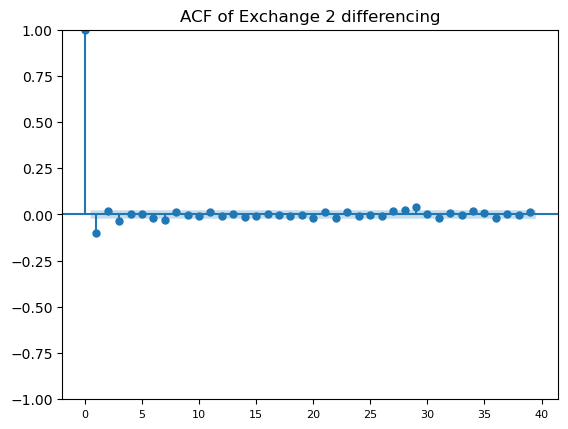

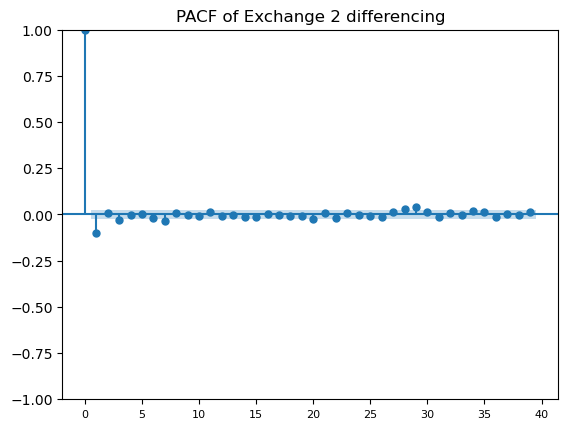

In [16]:
print('Exchange 2')
print(exchange2.describe())
print()
print('Exchange 2 Differencing')
print(exchange2_diff.describe())

#Plot
plt.figure(figsize=(12,6))
plt.rc('xtick', labelsize= 10)
exchange2.plot(kind='line')
plt.ylabel('Rate')
plt.title('Exchange 2')
plt.show()

#Decompose  ##multiplicative check
plt.figure(figsize=(20,6))
plt.rc('xtick', labelsize= 8)
exchange2_decomp = seasonal_decompose(exchange2, model = 'additive',  period = 365)
exchange2_decomp.plot()
plt.show()

#Plot
plt.figure(figsize=(12,6))
plt.rc('xtick', labelsize= 10)
exchange2_diff.plot(kind='line')
plt.ylabel('Exchange 2 differencing')
plt.title('Exchange 2 Differencing')
plt.show()

#Decompose
plt.figure(figsize=(20,6))
plt.rc('xtick', labelsize= 8)
exchange2_diff_decomp = seasonal_decompose(exchange2_diff, model = 'additive', period = 365)
exchange2_diff_decomp.plot()
plt.show()

#ADF
print(ADF(exchange2))
print(ADF(exchange2_diff))

#ACF,PACF
plot_acf(exchange2,title = 'ACF of Exchange 2')
plot_pacf(exchange2, title = 'PACF of Exchange 2')
plot_acf(exchange2_diff, title = 'ACF of Exchange 2 differencing')
plot_pacf(exchange2_diff, title = 'PACF of Exchange 2 differencing')

Exchange 3
                 y
count  7588.000000
mean      0.848146
std       0.168874
min       0.548617
25%       0.696864
50%       0.813959
75%       1.014018
max       1.374079

Exchange 3 Differencing
count    7587.000000
mean        0.000046
std         0.006416
min        -0.109971
25%        -0.002741
50%         0.000000
75%         0.002783
max         0.132340
Name: y, dtype: float64


<Figure size 1200x600 with 0 Axes>

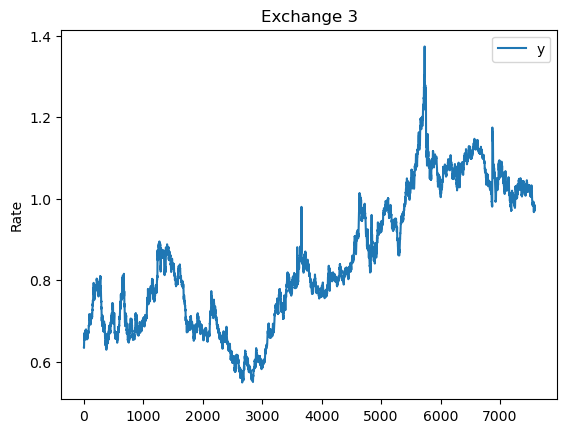

<Figure size 2000x600 with 0 Axes>

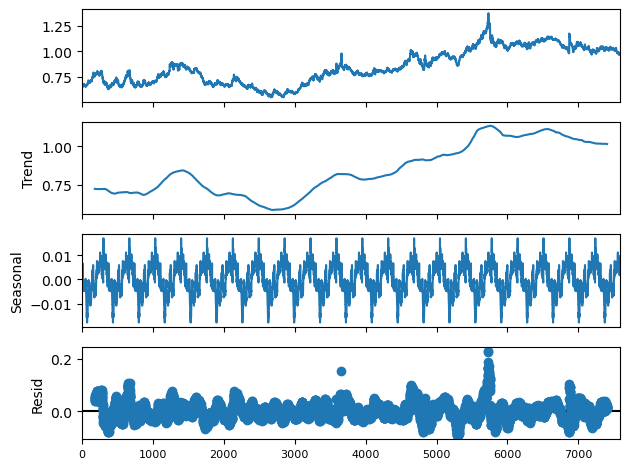

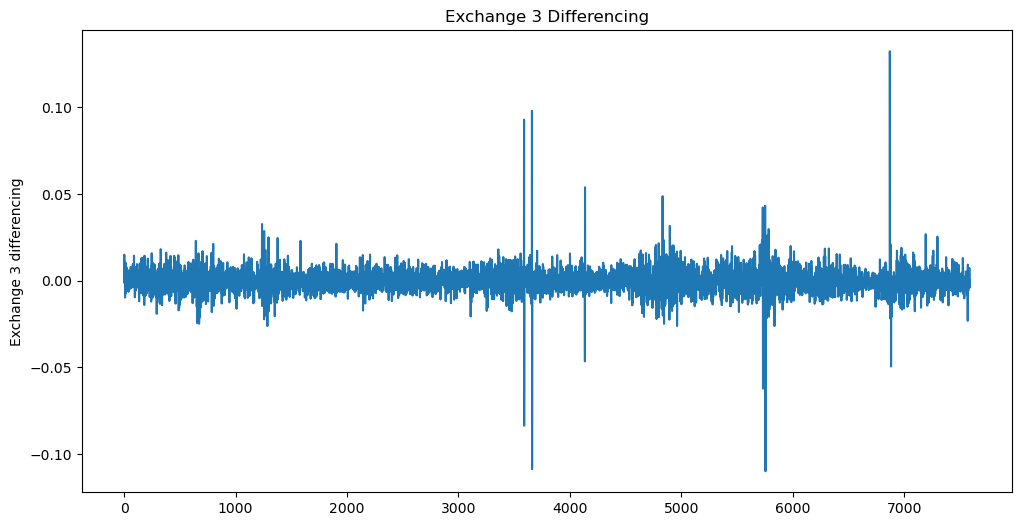

<Figure size 2000x600 with 0 Axes>

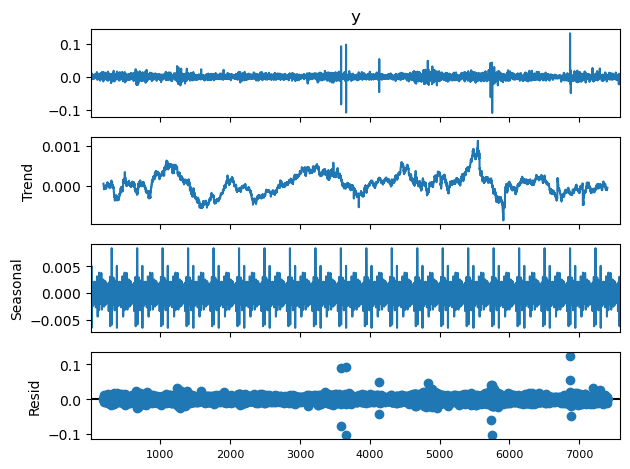

-----ADF-----
ADF Statistic: -1.586708
p-value: 0.4902670129
Lag: 14
observation: 7573
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
None
-----ADF-----
ADF Statistic: -24.489297
p-value: 0.0000000000
Lag: 13
observation: 7573
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
None


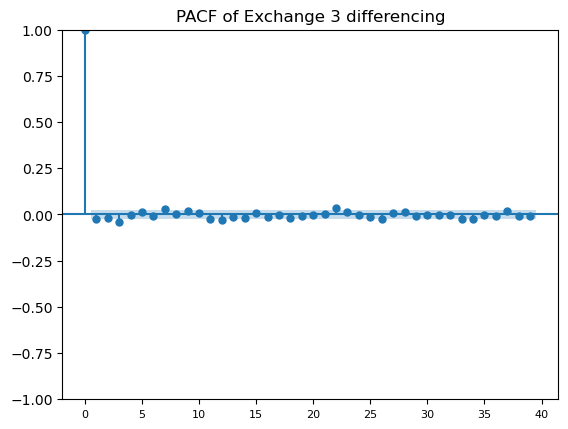

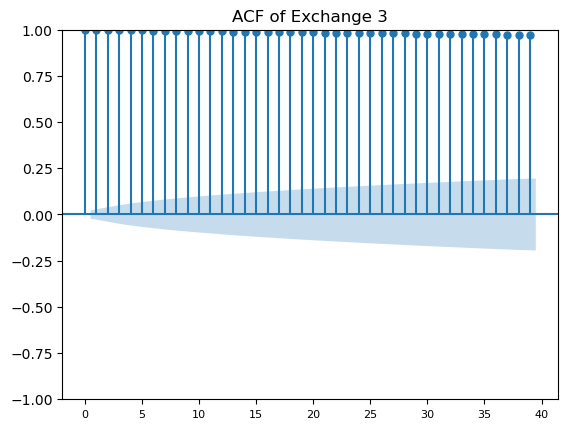

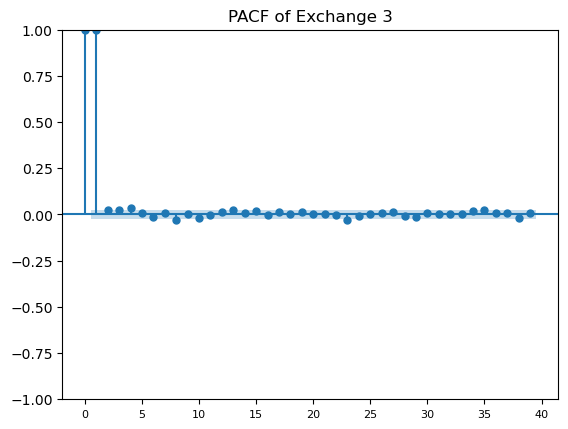

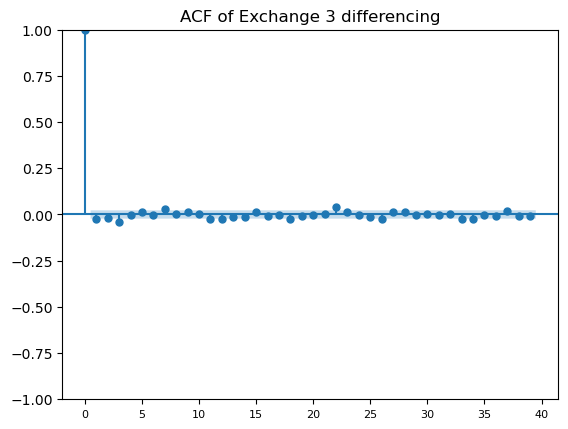

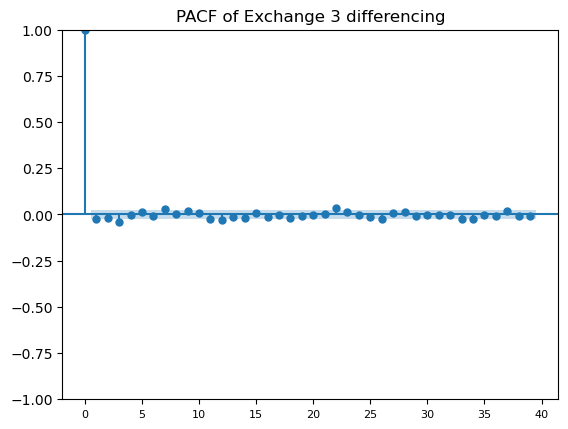

In [17]:
print('Exchange 3')
print(exchange3.describe())
print()
print('Exchange 3 Differencing')
print(exchange3_diff.describe())

#Plot
plt.figure(figsize=(12,6))
plt.rc('xtick', labelsize= 10)
exchange3.plot(kind='line')
plt.ylabel('Rate')
plt.title('Exchange 3')
plt.show()

#Decompose  ##multiplicative check
plt.figure(figsize=(20,6))
plt.rc('xtick', labelsize= 8)
exchange3_decomp = seasonal_decompose(exchange3, model = 'additive',  period = 365)
exchange3_decomp.plot()
plt.show()

#Plot
plt.figure(figsize=(12,6))
plt.rc('xtick', labelsize= 10)
exchange3_diff.plot(kind='line')
plt.ylabel('Exchange 3 differencing')
plt.title('Exchange 3 Differencing')
plt.show()

#Decompose
plt.figure(figsize=(20,6))
plt.rc('xtick', labelsize= 8)
exchange3_diff_decomp = seasonal_decompose(exchange3_diff, model = 'additive', period = 365)
exchange3_diff_decomp.plot()
plt.show()

#ADF
print(ADF(exchange3))
print(ADF(exchange3_diff))

#ACF,PACF
plot_acf(exchange3,title = 'ACF of Exchange 3')
plot_pacf(exchange3, title = 'PACF of Exchange 3')
plot_acf(exchange3_diff, title = 'ACF of Exchange 3 differencing')
plot_pacf(exchange3_diff, title = 'PACF of Exchange 3 differencing')

Exchange 4
                 y
count  7588.000000
mean      0.142833
std       0.023996
min       0.109292
25%       0.120814
50%       0.145212
75%       0.159948
max       0.237954

Exchange 4 Differencing
count    7587.000000
mean       -0.000009
std         0.001483
min        -0.076757
25%        -0.000005
50%         0.000000
75%         0.000012
max         0.076716
Name: y, dtype: float64


<Figure size 1200x600 with 0 Axes>

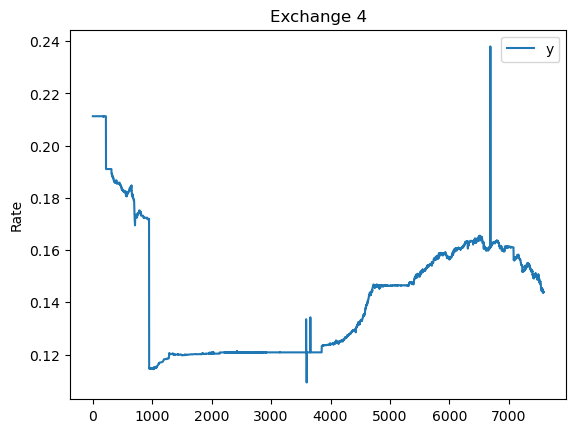

<Figure size 2000x600 with 0 Axes>

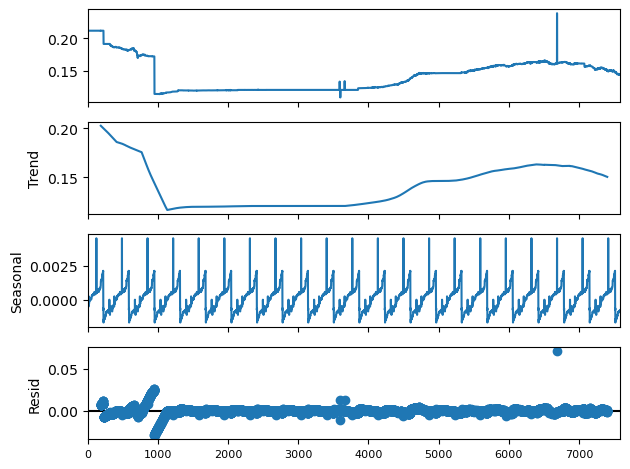

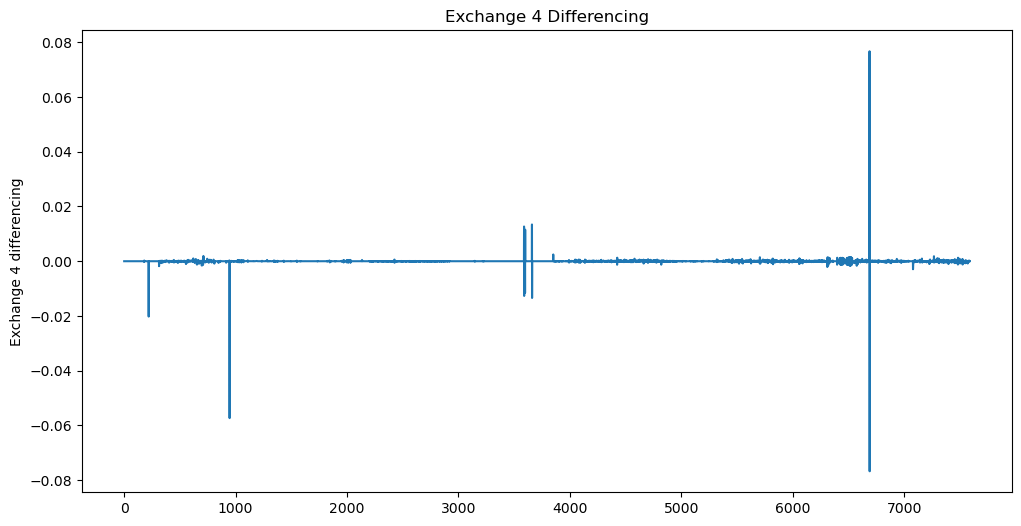

<Figure size 2000x600 with 0 Axes>

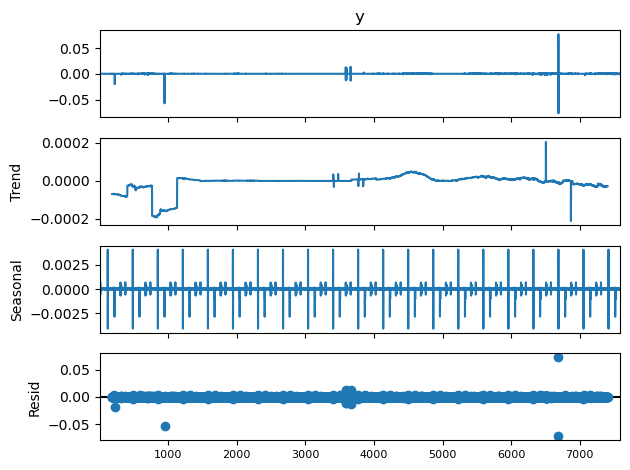

-----ADF-----
ADF Statistic: -2.869174
p-value: 0.0490518716
Lag: 5
observation: 7582
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
None
-----ADF-----
ADF Statistic: -47.260145
p-value: 0.0000000000
Lag: 4
observation: 7582
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
None


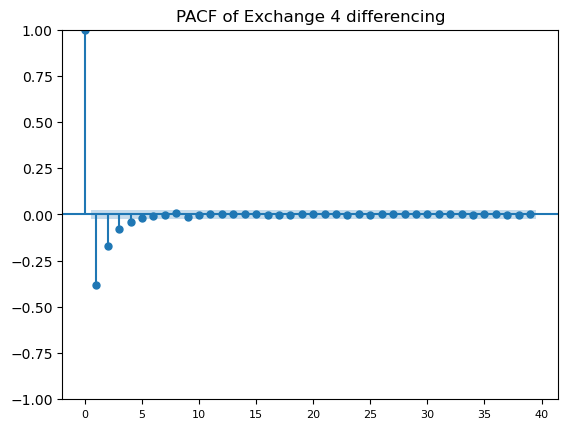

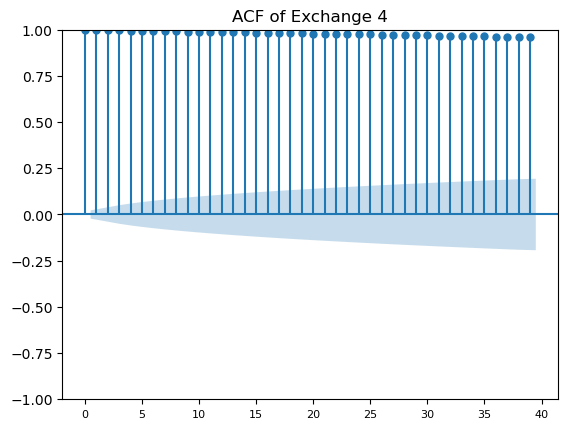

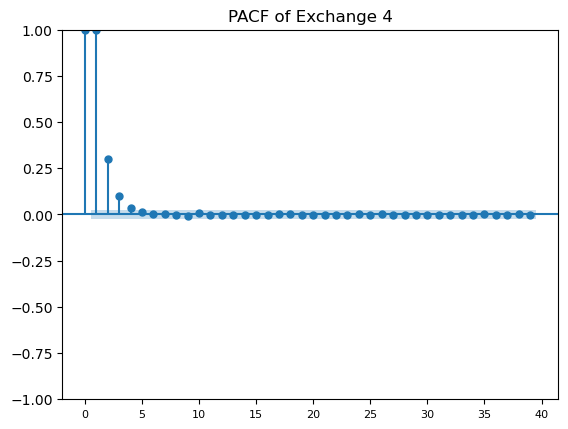

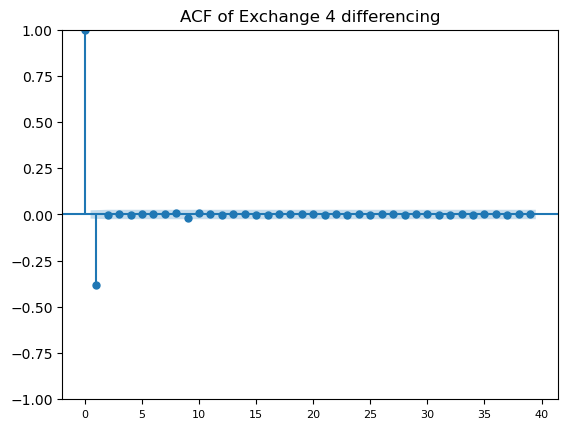

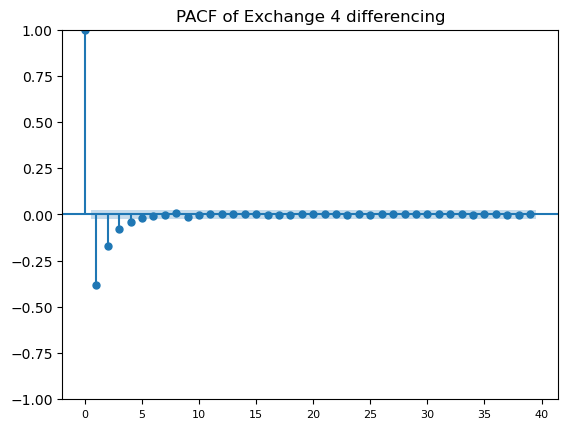

In [18]:
print('Exchange 4')
print(exchange4.describe())
print()
print('Exchange 4 Differencing')
print(exchange4_diff.describe())

#Plot
plt.figure(figsize=(12,6))
plt.rc('xtick', labelsize= 10)
exchange4.plot(kind='line')
plt.ylabel('Rate')
plt.title('Exchange 4')
plt.show()

#Decompose  ##multiplicative check
plt.figure(figsize=(20,6))
plt.rc('xtick', labelsize= 8)
exchange4_decomp = seasonal_decompose(exchange4, model = 'additive',  period = 365)
exchange4_decomp.plot()
plt.show()

#Plot
plt.figure(figsize=(12,6))
plt.rc('xtick', labelsize= 10)
exchange4_diff.plot(kind='line')
plt.ylabel('Exchange 4 differencing')
plt.title('Exchange 4 Differencing')
plt.show()

#Decompose
plt.figure(figsize=(20,6))
plt.rc('xtick', labelsize= 8)
exchange4_diff_decomp = seasonal_decompose(exchange4_diff, model = 'additive', period = 365)
exchange4_diff_decomp.plot()
plt.show()

#ADF
print(ADF(exchange4))
print(ADF(exchange4_diff))

#ACF,PACF
plot_acf(exchange4,title = 'ACF of Exchange 4')
plot_pacf(exchange4, title = 'PACF of Exchange 4')
plot_acf(exchange4_diff, title = 'ACF of Exchange 4 differencing')
plot_pacf(exchange4_diff, title = 'PACF of Exchange 4 differencing')

Exchange 5
                 y
count  7588.000000
mean      0.009343
std       0.001458
min       0.006254
25%       0.008331
50%       0.009151
75%       0.009995
max       0.013202

Exchange 5 Differencing
count    7.587000e+03
mean     2.263082e-07
std      6.452873e-05
min     -9.660000e-04
25%     -3.000000e-05
50%      0.000000e+00
75%      2.800000e-05
max      1.070000e-03
Name: y, dtype: float64


<Figure size 1200x600 with 0 Axes>

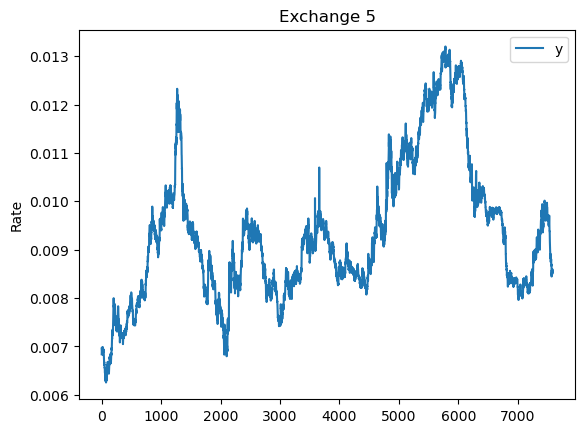

<Figure size 2000x600 with 0 Axes>

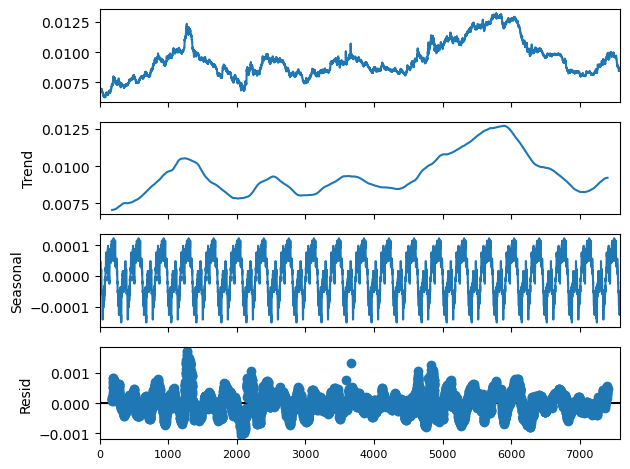

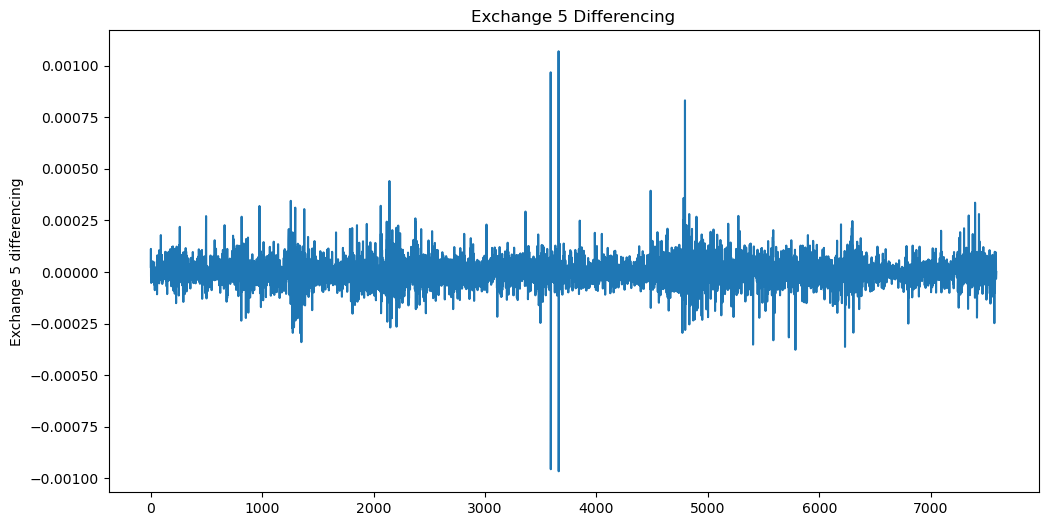

<Figure size 2000x600 with 0 Axes>

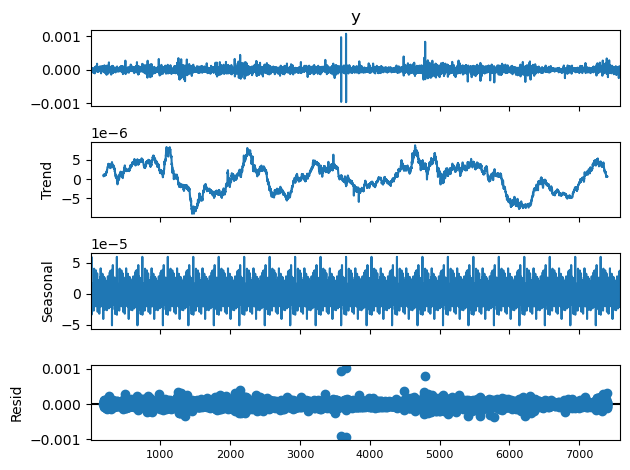

-----ADF-----
ADF Statistic: -2.120121
p-value: 0.2365012782
Lag: 3
observation: 7584
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
None
-----ADF-----
ADF Statistic: -52.537349
p-value: 0.0000000000
Lag: 2
observation: 7584
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
None


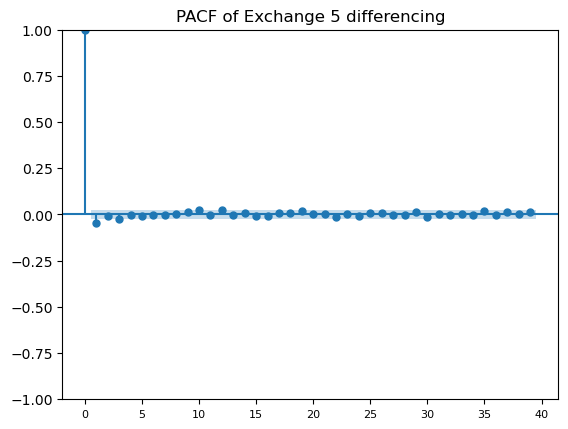

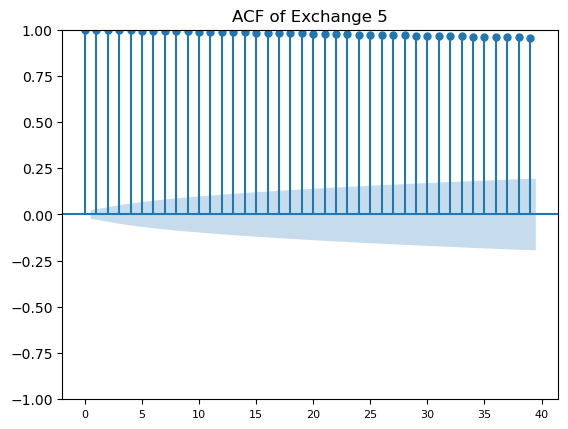

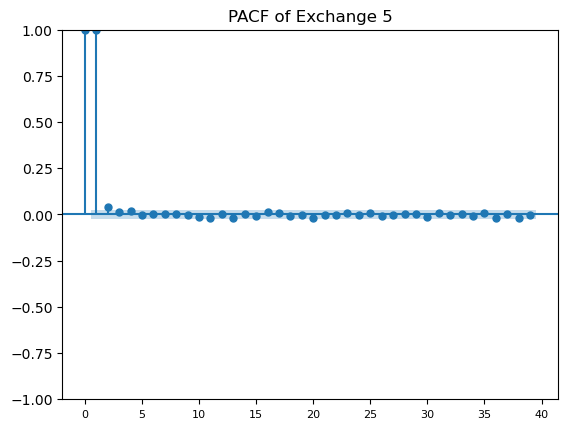

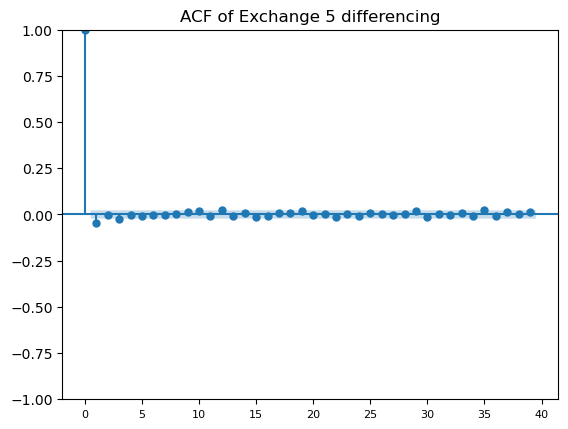

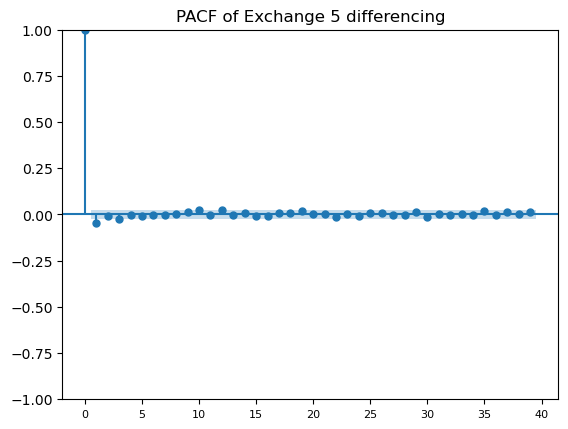

In [19]:
print('Exchange 5')
print(exchange5.describe())
print()
print('Exchange 5 Differencing')
print(exchange5_diff.describe())

#Plot
plt.figure(figsize=(12,6))
plt.rc('xtick', labelsize= 10)
exchange5.plot(kind='line')
plt.ylabel('Rate')
plt.title('Exchange 5')
plt.show()

#Decompose  ##multiplicative check
plt.figure(figsize=(20,6))
plt.rc('xtick', labelsize= 8)
exchange5_decomp = seasonal_decompose(exchange5, model = 'additive',  period = 365)
exchange5_decomp.plot()
plt.show()

#Plot
plt.figure(figsize=(12,6))
plt.rc('xtick', labelsize= 10)
exchange5_diff.plot(kind='line')
plt.ylabel('Exchange 5 differencing')
plt.title('Exchange 5 Differencing')
plt.show()

#Decompose
plt.figure(figsize=(20,6))
plt.rc('xtick', labelsize= 8)
exchange5_diff_decomp = seasonal_decompose(exchange5_diff, model = 'additive', period = 365)
exchange5_diff_decomp.plot()
plt.show()

#ADF
print(ADF(exchange5))
print(ADF(exchange5_diff))

#ACF,PACF
plot_acf(exchange5,title = 'ACF of Exchange 5')
plot_pacf(exchange5, title = 'PACF of Exchange 5')
plot_acf(exchange5_diff, title = 'ACF of Exchange 5 differencing')
plot_pacf(exchange5_diff, title = 'PACF of Exchange 5 differencing')

Exchange 6
                 y
count  7588.000000
mean      0.669673
std       0.082836
min       0.523834
25%       0.593287
50%       0.662767
75%       0.731835
max       0.832556

Exchange 6 Differencing
count    7587.000000
mean        0.000022
std         0.002661
min        -0.068040
25%        -0.000923
50%         0.000000
75%         0.000952
max         0.067816
Name: y, dtype: float64


<Figure size 1200x600 with 0 Axes>

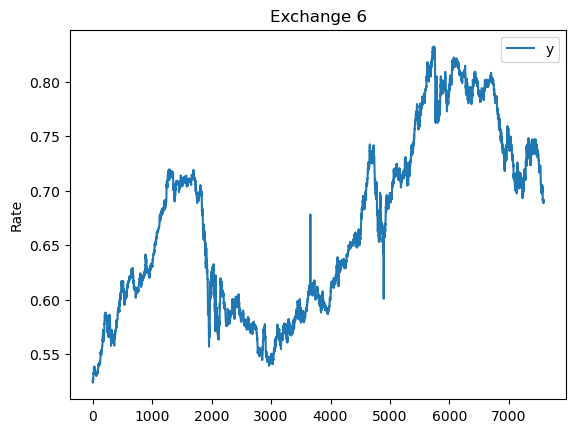

<Figure size 2000x600 with 0 Axes>

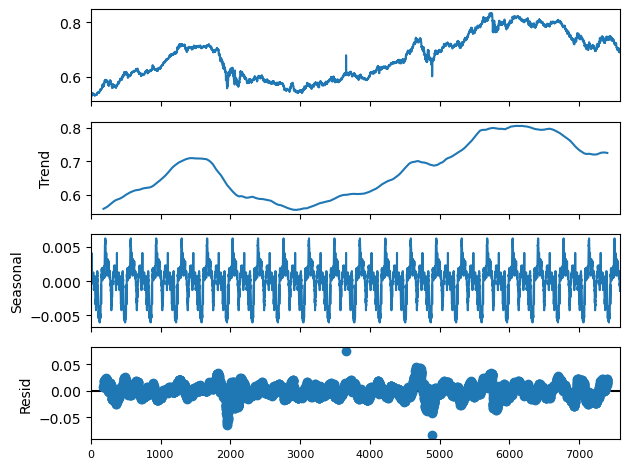

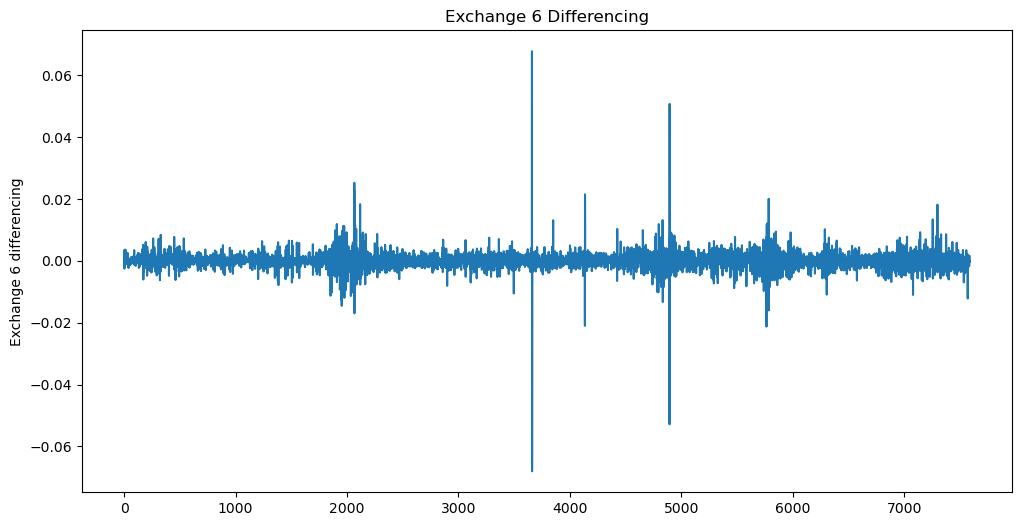

<Figure size 2000x600 with 0 Axes>

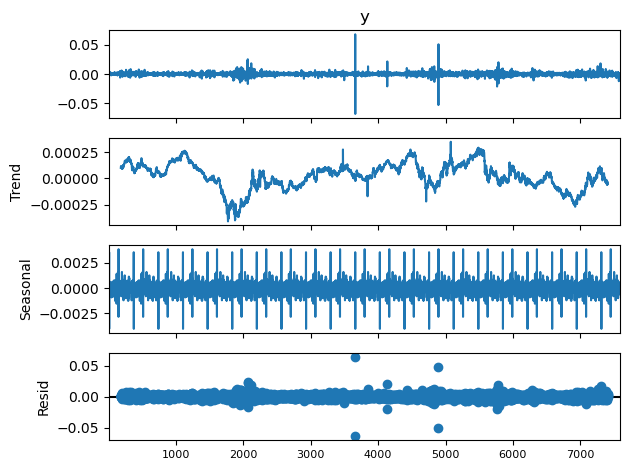

-----ADF-----
ADF Statistic: -1.747735
p-value: 0.4067009721
Lag: 17
observation: 7570
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
None
-----ADF-----
ADF Statistic: -20.503845
p-value: 0.0000000000
Lag: 16
observation: 7570
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
None


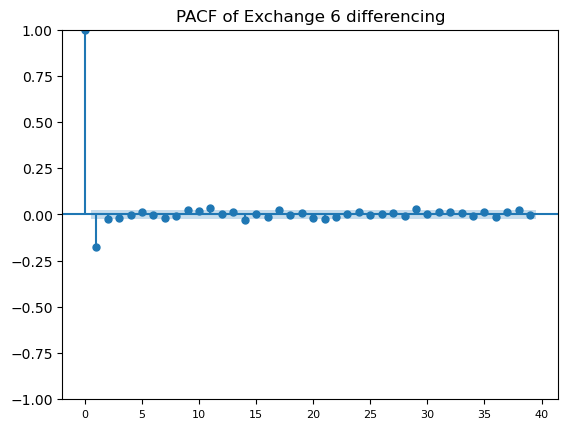

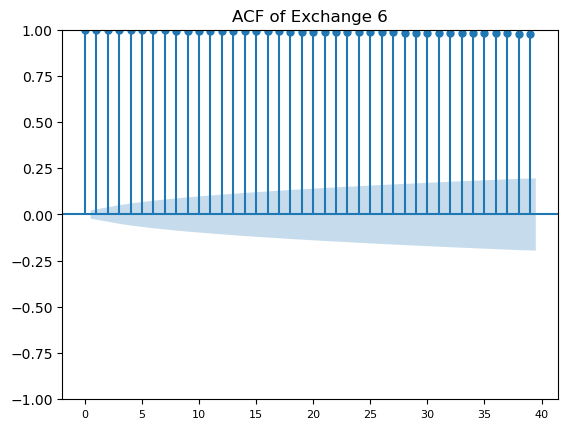

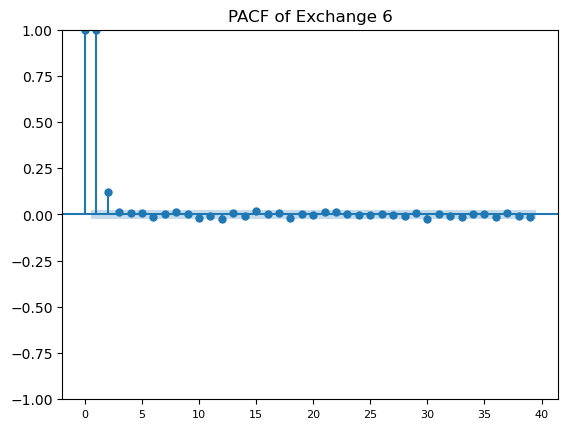

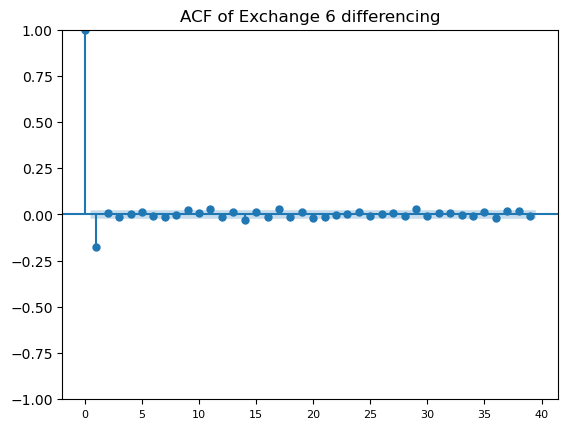

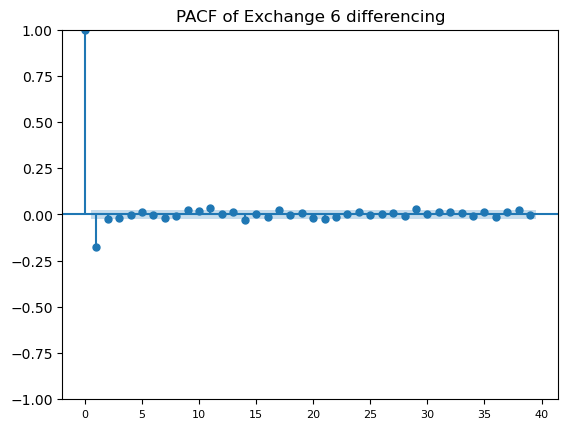

In [20]:
print('Exchange 6')
print(exchange6.describe())
print()
print('Exchange 6 Differencing')
print(exchange6_diff.describe())

#Plot
plt.figure(figsize=(12,6))
plt.rc('xtick', labelsize= 10)
exchange6.plot(kind='line')
plt.ylabel('Rate')
plt.title('Exchange 6')
plt.show()

#Decompose  ##multiplicative check
plt.figure(figsize=(20,6))
plt.rc('xtick', labelsize= 8)
exchange6_decomp = seasonal_decompose(exchange6, model = 'additive',  period = 365)
exchange6_decomp.plot()
plt.show()

#Plot
plt.figure(figsize=(12,6))
plt.rc('xtick', labelsize= 10)
exchange6_diff.plot(kind='line')
plt.ylabel('Exchange 6 differencing')
plt.title('Exchange 6 Differencing')
plt.show()

#Decompose
plt.figure(figsize=(20,6))
plt.rc('xtick', labelsize= 8)
exchange6_diff_decomp = seasonal_decompose(exchange6_diff, model = 'additive', period = 365)
exchange6_diff_decomp.plot()
plt.show()

#ADF
print(ADF(exchange6))
print(ADF(exchange6_diff))

#ACF,PACF
plot_acf(exchange6,title = 'ACF of Exchange 6')
plot_pacf(exchange6, title = 'PACF of Exchange 6')
plot_acf(exchange6_diff, title = 'ACF of Exchange 6 differencing')
plot_pacf(exchange6_diff, title = 'PACF of Exchange 6 differencing')

Exchange OT
                 y
count  7588.000000
mean      0.654418
std       0.115292
min       0.393153
25%       0.566000
50%       0.669187
75%       0.734901
max       0.882379

Exchange OT Differencing
count    7587.000000
mean        0.000013
std         0.004864
min        -0.069715
25%        -0.002000
50%         0.000000
75%         0.002159
max         0.073715
Name: y, dtype: float64


<Figure size 1200x600 with 0 Axes>

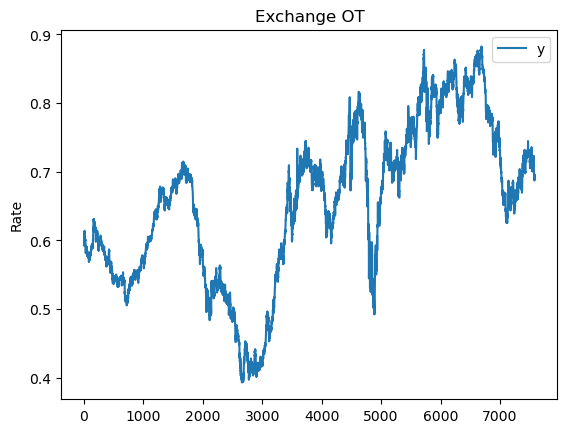

<Figure size 2000x600 with 0 Axes>

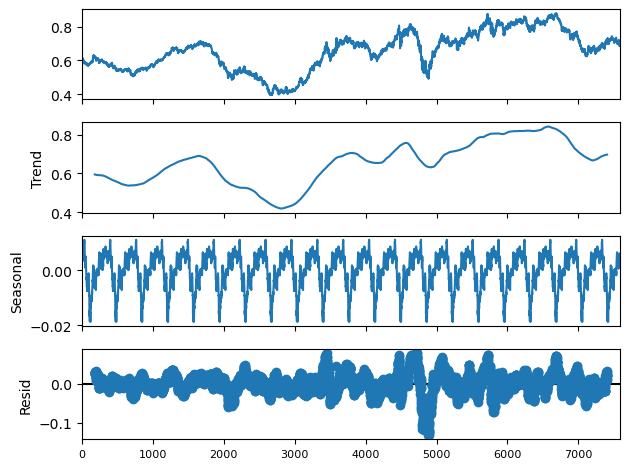

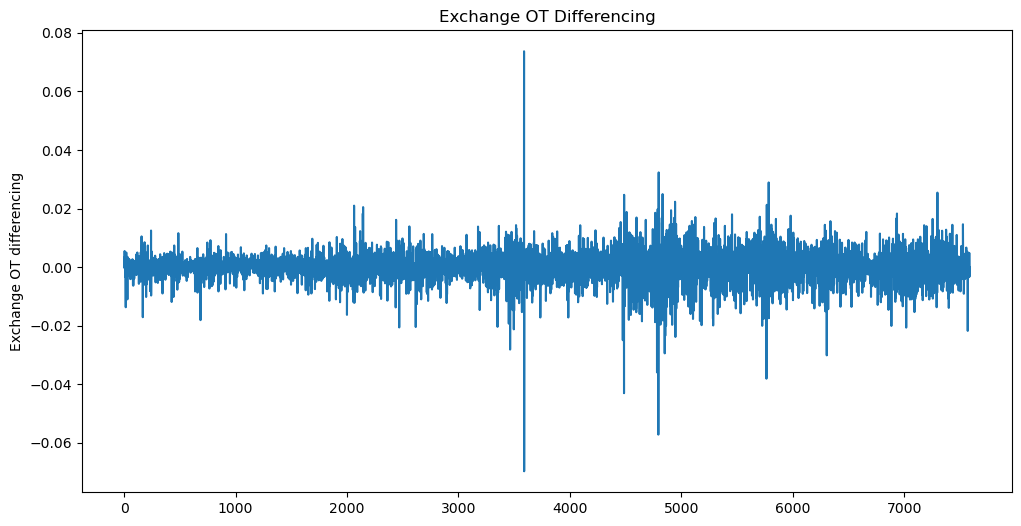

<Figure size 2000x600 with 0 Axes>

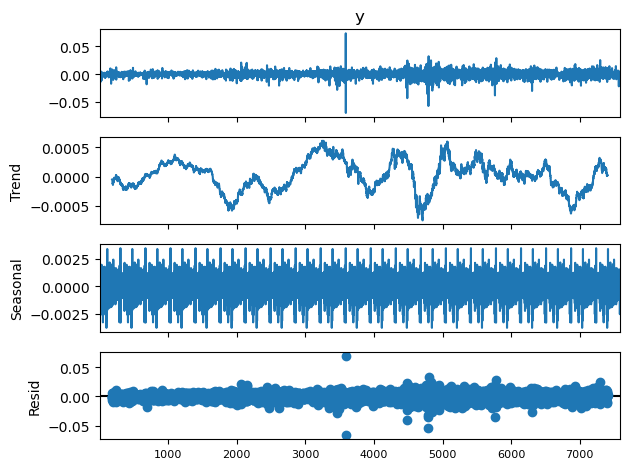

-----ADF-----
ADF Statistic: -1.728197
p-value: 0.4166461724
Lag: 3
observation: 7584
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
None
-----ADF-----
ADF Statistic: -52.335680
p-value: 0.0000000000
Lag: 2
observation: 7584
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
None


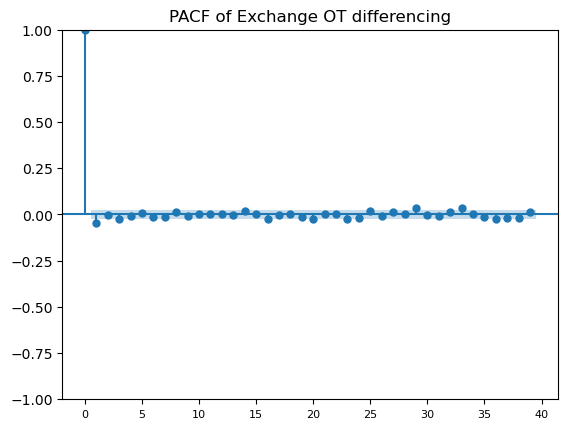

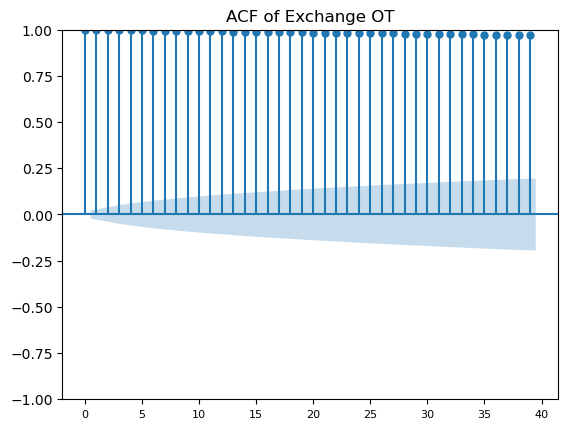

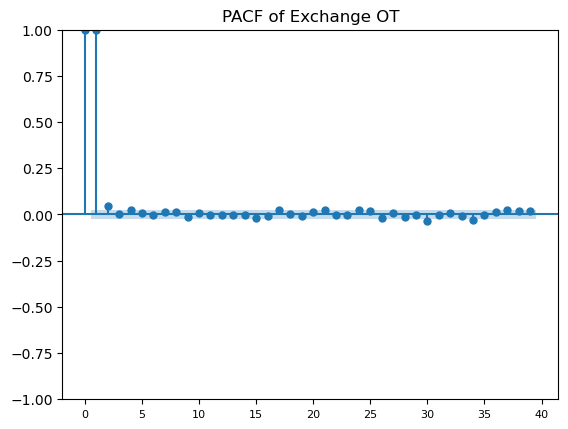

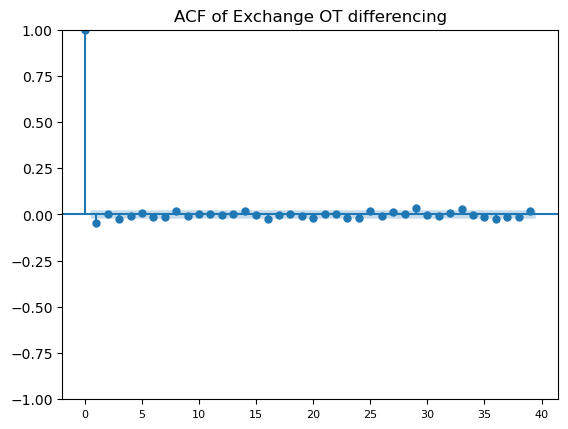

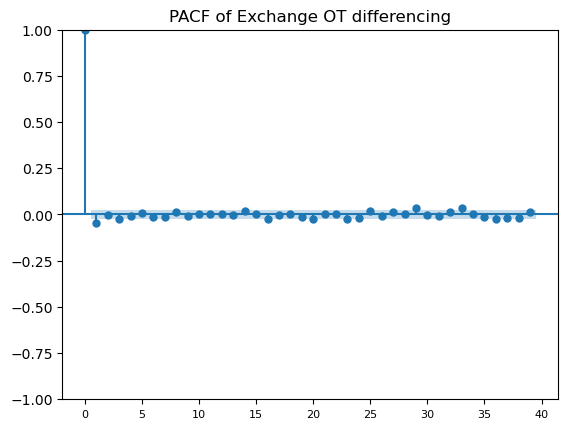

In [21]:
print('Exchange OT')
print(exchangeOT.describe())
print()
print('Exchange OT Differencing')
print(exchangeOT_diff.describe())

#Plot
plt.figure(figsize=(12,6))
plt.rc('xtick', labelsize= 10)
exchangeOT.plot(kind='line')
plt.ylabel('Rate')
plt.title('Exchange OT')
plt.show()

#Decompose  ##multiplicative check
plt.figure(figsize=(20,6))
plt.rc('xtick', labelsize= 8)
exchangeOT_decomp = seasonal_decompose(exchangeOT, model = 'additive',  period = 365)
exchangeOT_decomp.plot()
plt.show()

#Plot
plt.figure(figsize=(12,6))
plt.rc('xtick', labelsize= 10)
exchangeOT_diff.plot(kind='line')
plt.ylabel('Exchange OT differencing')
plt.title('Exchange OT Differencing')
plt.show()

#Decompose
plt.figure(figsize=(20,6))
plt.rc('xtick', labelsize= 8)
exchangeOT_diff_decomp = seasonal_decompose(exchangeOT_diff, model = 'additive', period = 365)
exchangeOT_diff_decomp.plot()
plt.show()

#ADF
print(ADF(exchangeOT))
print(ADF(exchangeOT_diff))

#ACF,PACF
plot_acf(exchangeOT,title = 'ACF of Exchange OT')
plot_pacf(exchangeOT, title = 'PACF of Exchange OT')
plot_acf(exchangeOT_diff, title = 'ACF of Exchange OT differencing')
plot_pacf(exchangeOT_diff, title = 'PACF of Exchange OT differencing')

# Train&Test split

In [22]:
gold_forecasting_horizon = int(gold.shape[0]*0.1) 
gold_train = gold['Price'][:-gold_forecasting_horizon]
gold_test = gold['Price'][-gold_forecasting_horizon:]

silver_forecasting_horizon = int(silver.shape[0]*0.1) 
silver_train = silver['Price'][:-silver_forecasting_horizon]
silver_test = silver['Price'][-silver_forecasting_horizon:]

platinum_forecasting_horizon = int(platinum.shape[0]*0.1) 
platinum_train = platinum['Price'][:-platinum_forecasting_horizon]
platinum_test = platinum['Price'][-platinum_forecasting_horizon:]

In [23]:
forecasting_horizon = int(exchange.shape[0]*0.2)
exchange0_train = exchange0[:-forecasting_horizon]
exchange1_train = exchange1[:-forecasting_horizon]
exchange2_train = exchange2[:-forecasting_horizon]
exchange3_train = exchange3[:-forecasting_horizon]
exchange4_train = exchange4[:-forecasting_horizon]
exchange5_train = exchange5[:-forecasting_horizon]
exchange6_train = exchange6[:-forecasting_horizon]
exchangeOT_train = exchangeOT[:-forecasting_horizon]

# ARIMA fitting

In [24]:
p = range(0,6)
d = range(0,3)
q = range(0,6)

orders = list(itertools.product(p,d,q))

In [25]:
#Gold select order

gold_dict_model = {}

for order in orders:
    gold_model = ARIMA(gold_train, order = order)
    gold_model_fit = gold_model.fit()
    gold_dict_model[order] = [gold_model_fit.llf, gold_model_fit.aic, gold_model_fit.bic]
    
gold_information = pd.DataFrame.from_dict(gold_dict_model, orient='index', columns=['llf', 'Aic', 'Bic'])
print('By BIC')
print(gold_information.sort_values(by=['Bic'], ascending =True))

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsm

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarima

By BIC
                   llf           Aic           Bic
(0, 1, 0) -4758.056325   9518.112650   9523.168826
(0, 2, 1) -4757.209300   9518.418600   9528.529225
(1, 1, 0) -4757.887096   9519.774192   9529.886542
(0, 1, 1) -4757.899112   9519.798225   9529.910575
(3, 1, 2) -4744.786568   9501.573136   9531.910188
...                ...           ...           ...
(0, 0, 4) -6568.642349  13149.284697  13179.626919
(0, 0, 3) -6638.671780  13287.343559  13312.628744
(0, 0, 2) -6705.163979  13418.327957  13438.556105
(0, 0, 1) -7284.644615  14575.289230  14590.460341
(0, 0, 0) -8044.712341  16093.424682  16103.538756

[108 rows x 3 columns]


C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [26]:
gold_model_aic = pm.auto_arima(gold_train, information_criteria = 'aic')
gold_model_bic = pm.auto_arima(gold_train, information_criteria = 'bic')

print(gold_model_aic.summary())
print(gold_model_bic.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1161
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -4758.056
Date:                Sun, 17 Mar 2024   AIC                           9518.113
Time:                        22:19:55   BIC                           9523.169
Sample:                             0   HQIC                          9520.020
                               - 1161                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       213.9357      3.771     56.728      0.000     206.544     221.327
Ljung-Box (L1) (Q):                   0.40   Jarque-Bera (JB):              4168.74
Prob(Q):                              0.53   Pr

In [27]:
#Silver select order

silver_dict_model = {}

for order in orders:
    silver_model = ARIMA(silver_train, order = order)
    silver_model_fit = silver_model.fit()
    silver_dict_model[order] = [silver_model_fit.llf, silver_model_fit.aic, silver_model_fit.bic]
    
silver_information = pd.DataFrame.from_dict(silver_dict_model, orient='index', columns=['llf', 'Aic', 'Bic'])
print('By BIC')
print(silver_information.sort_values(by=['Bic'], ascending =True))

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmo

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmo

By BIC
                   llf          Aic          Bic
(1, 1, 0)  -534.574813  1073.149627  1083.246399
(0, 1, 2)  -531.637086  1069.274172  1084.419331
(2, 1, 0)  -531.983704  1069.967409  1085.112568
(0, 1, 1)  -536.001685  1076.003369  1086.100142
(1, 1, 1)  -532.902626  1071.805252  1086.950411
...                ...          ...          ...
(0, 0, 4) -1423.384589  2858.769179  2889.064708
(0, 0, 3) -1679.974439  3369.948878  3395.195152
(0, 0, 2) -2030.294210  4068.588420  4088.785439
(0, 0, 1) -2538.172779  5082.345558  5097.493322
(0, 0, 0) -3247.001154  6498.002309  6508.100818

[108 rows x 3 columns]


C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [28]:
silver_model_aic = pm.auto_arima(silver_train, information_criteria = 'aic')
silver_model_bic = pm.auto_arima(silver_train, information_criteria = 'bic')

print(silver_model_aic.summary())
print(silver_model_bic.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1152
Model:               SARIMAX(0, 1, 4)   Log Likelihood                -526.721
Date:                Sun, 17 Mar 2024   AIC                           1063.442
Time:                        22:21:48   BIC                           1088.684
Sample:                             0   HQIC                          1072.970
                               - 1152                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1302      0.014     -9.215      0.000      -0.158      -0.103
ma.L2          0.0875      0.016      5.436      0.000       0.056       0.119
ma.L3         -0.0293      0.016     -1.876      0.0

In [29]:
#Platinum select order

platinum_dict_model = {}

for order in orders:
    platinum_model = ARIMA(platinum_train, order = order)
    platinum_model_fit = platinum_model.fit()
    platinum_dict_model[order] = [platinum_model_fit.llf, platinum_model_fit.aic, platinum_model_fit.bic]
    
platinum_information = pd.DataFrame.from_dict(platinum_dict_model, orient='index', columns=['llf', 'Aic', 'Bic'])
print('By BIC')
print(platinum_information.sort_values(by=['Bic'], ascending =True))

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsm

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmo

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\

By BIC
                   llf           Aic           Bic
(2, 1, 2) -5666.219921  11342.439842  11368.664550
(0, 1, 0) -5680.867938  11363.735877  11368.980818
(1, 1, 0) -5680.036571  11364.073142  11374.563025
(0, 1, 1) -5680.072300  11364.144600  11374.634483
(3, 1, 2) -5666.155811  11344.311623  11375.781272
...                ...           ...           ...
(0, 0, 3) -6781.706848  13573.413696  13599.641971
(0, 0, 5) -6792.810731  13599.621462  13636.341047
(0, 0, 2) -7153.005614  14314.011228  14334.993848
(0, 0, 1) -7757.147472  15520.294944  15536.031909
(0, 0, 0) -8609.288907  17222.577814  17233.069124

[108 rows x 3 columns]


C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [30]:
platinum_model_aic = pm.auto_arima(platinum_train, information_criteria = 'aic')
platinum_model_bic = pm.auto_arima(platinum_train, information_criteria = 'bic')

print(platinum_model_aic.summary())
print(platinum_model_bic.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1402
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -5680.868
Date:                Sun, 17 Mar 2024   AIC                          11363.736
Time:                        22:23:33   BIC                          11368.981
Sample:                             0   HQIC                         11365.696
                               - 1402                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       194.7783      3.581     54.392      0.000     187.760     201.797
Ljung-Box (L1) (Q):                   1.66   Jarque-Bera (JB):              2526.81
Prob(Q):                              0.20   Pr

In [31]:
#Exchange0 select order

exchange0_dict_model = {}

for order in orders:
    model = ARIMA(exchange0_train, order = order)
    model_fit = model.fit()
    exchange0_dict_model[order] = [model_fit.llf, model_fit.aic, model_fit.bic]
    
information = pd.DataFrame.from_dict(exchange0_dict_model, orient='index', columns=['llf', 'Aic', 'Bic'])
print('By BIC')
print(information.sort_values(by=['Bic'], ascending =True))

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:607: Convergence

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmo

By BIC
                    llf           Aic           Bic
(1, 1, 0)  22719.171636 -45434.343272 -45420.921044
(1, 1, 1)  22723.247909 -45440.495817 -45420.362476
(0, 1, 1)  22718.663045 -45433.326091 -45419.903863
(2, 1, 0)  22721.018986 -45436.037972 -45415.904631
(0, 1, 2)  22720.399928 -45434.799856 -45414.666514
...                 ...           ...           ...
(0, 0, 4)  14829.381075 -29646.762150 -29606.494479
(0, 0, 3)  13165.036472 -26320.072944 -26286.516551
(0, 0, 2)  10778.457510 -21548.915021 -21522.069906
(0, 0, 1)   7474.815861 -14943.631723 -14923.497887
(0, 0, 0)   3470.882104  -6937.764209  -6924.341652

[108 rows x 3 columns]


In [32]:
model_aic = pm.auto_arima(exchange0_train, information_criteria = 'aic')
model_bic = pm.auto_arima(exchange0_train, information_criteria = 'bic')

print(model_aic.summary())
print(model_bic.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:               SARIMAX(1, 1, 1)   Log Likelihood               22723.248
Date:                Sun, 17 Mar 2024   AIC                         -45440.496
Time:                        22:28:04   BIC                         -45420.362
Sample:                             0   HQIC                        -45433.508
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5976      0.062     -9.666      0.000      -0.719      -0.476
ma.L1          0.5402      0.064      8.445      0.000       0.415       0.666
sigma2       3.28e-05   1.95e-07    168.224      0.0

In [ ]:
#Exchange1 select order

exchange1_dict_model = {}

for order in orders:
    model = ARIMA(exchange1_train, order = order)
    model_fit = model.fit()
    print(model_fit.summary())
    exchange1_dict_model[order] = [model_fit.llf, model_fit.aic, model_fit.bic]
    
information = pd.DataFrame.from_dict(exchange1_dict_model, orient='index', columns=['llf', 'Aic', 'Bic'])
print('By BIC')
print(information.sort_values(by=['Bic'], ascending =True))

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                          ARIMA   Log Likelihood                2519.762
Date:                Sun, 17 Mar 2024   AIC                          -5035.524
Time:                        22:28:04   BIC                          -5022.101
Sample:                             0   HQIC                         -5030.865
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6608      0.002    686.172      0.000       1.656       1.666
sigma2         0.0255      0.001     40.949      0.000       0.024       0.027
Ljung-Box (L1) (Q):                6046.91   Jarque-

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(0, 0, 4)   Log Likelihood               13042.700
Date:                Sun, 17 Mar 2024   AIC                         -26073.401
Time:                        22:28:19   BIC                         -26033.133
Sample:                             0   HQIC                        -26059.425
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6586      0.003    605.754      0.000       1.653       1.664
ma.L1          1.7873      0.007    262.701      0.000       1.774       1.801
ma.L2          2.0126      0.013    158.981      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(0, 0, 5)   Log Likelihood               11364.779
Date:                Sun, 17 Mar 2024   AIC                         -22715.559
Time:                        22:28:28   BIC                         -22668.580
Sample:                             0   HQIC                        -22699.254
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6604      0.003    631.558      0.000       1.655       1.666
ma.L1          1.0033      0.005    195.316      0.000       0.993       1.013
ma.L2          0.5945      0.004    141.517      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(0, 1, 1)   Log Likelihood               18971.357
Date:                Sun, 17 Mar 2024   AIC                         -37938.714
Time:                        22:28:28   BIC                         -37925.292
Sample:                             0   HQIC                        -37934.056
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0384      0.004    -10.941      0.000      -0.045      -0.032
sigma2         0.0001    5.4e-07    209.192      0.000       0.000       0.000
Ljung-Box (L1) (Q):                   0.00   Jarque-

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(0, 1, 2)   Log Likelihood               18971.367
Date:                Sun, 17 Mar 2024   AIC                         -37936.734
Time:                        22:28:29   BIC                         -37916.601
Sample:                             0   HQIC                        -37929.747
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0384      0.004    -10.740      0.000      -0.045      -0.031
ma.L2         -0.0012      0.010     -0.123      0.902      -0.020       0.018
sigma2         0.0001   5.51e-07    204.969      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(0, 2, 0)   Log Likelihood               16746.452
Date:                Sun, 17 Mar 2024   AIC                         -33490.904
Time:                        22:28:32   BIC                         -33484.193
Sample:                             0   HQIC                        -33488.575
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0002   6.66e-07    352.302      0.000       0.000       0.000
Ljung-Box (L1) (Q):                1632.45   Jarque-Bera (JB):           1607889.49
Prob(Q):                              0.00   Pr

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(0, 2, 4)   Log Likelihood               18963.666
Date:                Sun, 17 Mar 2024   AIC                         -37917.331
Time:                        22:28:40   BIC                         -37883.776
Sample:                             0   HQIC                        -37905.685
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0393      0.004   -256.813      0.000      -1.047      -1.031
ma.L2          0.0373      0.011      3.285      0.001       0.015       0.059
ma.L3         -0.0256      0.014     -1.808      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(1, 0, 3)   Log Likelihood               18977.754
Date:                Sun, 17 Mar 2024   AIC                         -37943.508
Time:                        22:28:45   BIC                         -37903.240
Sample:                             0   HQIC                        -37929.532
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6609      0.069     23.904      0.000       1.525       1.797
ar.L1          0.9981      0.001   1257.337      0.000       0.997       1.000
ma.L1         -0.0376      0.004    -10.030      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(1, 0, 4)   Log Likelihood               18979.469
Date:                Sun, 17 Mar 2024   AIC                         -37944.938
Time:                        22:28:50   BIC                         -37897.959
Sample:                             0   HQIC                        -37928.633
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6609      0.068     24.347      0.000       1.527       1.795
ar.L1          0.9980      0.001   1226.900      0.000       0.996       1.000
ma.L1         -0.0372      0.004     -9.691      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(1, 1, 1)   Log Likelihood               18971.364
Date:                Sun, 17 Mar 2024   AIC                         -37936.729
Time:                        22:28:54   BIC                         -37916.596
Sample:                             0   HQIC                        -37929.741
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0148      0.254      0.058      0.954      -0.483       0.513
ma.L1         -0.0532      0.254     -0.210      0.834      -0.550       0.444
sigma2         0.0001   5.49e-07    205.570      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(1, 2, 0)   Log Likelihood               17696.829
Date:                Sun, 17 Mar 2024   AIC                         -35389.657
Time:                        22:28:59   BIC                         -35376.235
Sample:                             0   HQIC                        -35384.999
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5185      0.004   -131.526      0.000      -0.526      -0.511
sigma2         0.0002   8.95e-07    191.735      0.000       0.000       0.000
Ljung-Box (L1) (Q):                 168.75   Jarque-

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(1, 2, 1)   Log Likelihood               18961.134
Date:                Sun, 17 Mar 2024   AIC                         -37916.268
Time:                        22:29:00   BIC                         -37896.135
Sample:                             0   HQIC                        -37909.280
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0383      0.004     -9.921      0.000      -0.046      -0.031
ma.L1         -0.9999      0.013    -74.305      0.000      -1.026      -0.973
sigma2         0.0001   1.44e-06     78.559      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(2, 0, 0)   Log Likelihood               18975.325
Date:                Sun, 17 Mar 2024   AIC                         -37942.650
Time:                        22:29:16   BIC                         -37915.805
Sample:                             0   HQIC                        -37933.333
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6609      0.066     24.976      0.000       1.531       1.791
ar.L1          0.9608      0.004    270.450      0.000       0.954       0.968
ar.L2          0.0370      0.004     10.043      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(2, 0, 2)   Log Likelihood               18975.313
Date:                Sun, 17 Mar 2024   AIC                         -37938.626
Time:                        22:29:19   BIC                         -37898.358
Sample:                             0   HQIC                        -37924.651
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6609      0.067     24.818      0.000       1.530       1.792
ar.L1          0.2497      0.001    202.300      0.000       0.247       0.252
ar.L2          0.7467      0.002    486.097      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(2, 1, 0)   Log Likelihood               18971.347
Date:                Sun, 17 Mar 2024   AIC                         -37936.695
Time:                        22:29:27   BIC                         -37916.562
Sample:                             0   HQIC                        -37929.707
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0381      0.004    -10.656      0.000      -0.045      -0.031
ar.L2         -0.0011      0.010     -0.112      0.911      -0.021       0.018
sigma2         0.0001   5.54e-07    203.960      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(2, 1, 1)   Log Likelihood               18971.348
Date:                Sun, 17 Mar 2024   AIC                         -37934.696
Time:                        22:29:28   BIC                         -37907.852
Sample:                             0   HQIC                        -37925.379
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0191      0.002    -10.431      0.000      -0.023      -0.016
ar.L2       6.241e-05      0.010      0.006      0.995      -0.019       0.019
ma.L1         -0.0191      0.002    -10.839      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(2, 2, 0)   Log Likelihood               18027.907
Date:                Sun, 17 Mar 2024   AIC                         -36049.814
Time:                        22:29:32   BIC                         -36029.682
Sample:                             0   HQIC                        -36042.827
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6852      0.004   -159.722      0.000      -0.694      -0.677
ar.L2         -0.3215      0.006    -55.433      0.000      -0.333      -0.310
sigma2         0.0002   8.71e-07    176.838      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(2, 2, 1)   Log Likelihood               18961.119
Date:                Sun, 17 Mar 2024   AIC                         -37914.239
Time:                        22:29:34   BIC                         -37887.395
Sample:                             0   HQIC                        -37904.922
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0384      0.004     -9.837      0.000      -0.046      -0.031
ar.L2         -0.0013      0.010     -0.134      0.894      -0.021       0.018
ma.L1         -0.9997      0.007   -146.179      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(2, 2, 2)   Log Likelihood               18965.000
Date:                Sun, 17 Mar 2024   AIC                         -37919.999
Time:                        22:29:37   BIC                         -37886.445
Sample:                             0   HQIC                        -37908.354
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9992      0.024    -42.032      0.000      -1.046      -0.953
ar.L2         -0.0273      0.006     -4.745      0.000      -0.039      -0.016
ma.L1         -0.0394      0.024     -1.641      0.1

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(2, 2, 3)   Log Likelihood               18959.218
Date:                Sun, 17 Mar 2024   AIC                         -37906.436
Time:                        22:29:41   BIC                         -37866.171
Sample:                             0   HQIC                        -37892.462
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5687      0.143    -10.985      0.000      -1.849      -1.289
ar.L2         -0.8763      0.110     -7.965      0.000      -1.092      -0.661
ma.L1          0.5600      0.143      3.914      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(3, 0, 1)   Log Likelihood               18975.317
Date:                Sun, 17 Mar 2024   AIC                         -37938.634
Time:                        22:29:50   BIC                         -37898.367
Sample:                             0   HQIC                        -37924.659
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6609      0.067     24.914      0.000       1.530       1.792
ar.L1          0.6444      0.003    203.578      0.000       0.638       0.651
ar.L2          0.3410      0.007     50.501      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(3, 0, 5)   Log Likelihood               18980.465
Date:                Sun, 17 Mar 2024   AIC                         -37940.930
Time:                        22:29:56   BIC                         -37873.817
Sample:                             0   HQIC                        -37917.638
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6609      0.066     25.194      0.000       1.532       1.790
ar.L1          0.8031      0.724      1.109      0.267      -0.616       2.222
ar.L2          0.6226      1.189      0.523      0.6

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(3, 1, 4)   Log Likelihood               18975.826
Date:                Sun, 17 Mar 2024   AIC                         -37935.651
Time:                        22:30:00   BIC                         -37881.962
Sample:                             0   HQIC                        -37917.018
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0364      0.361      0.101      0.920      -0.672       0.745
ar.L2         -0.0145      0.293     -0.049      0.961      -0.588       0.559
ar.L3         -0.3913      0.263     -1.489      0.1

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(3, 2, 1)   Log Likelihood               18963.355
Date:                Sun, 17 Mar 2024   AIC                         -37916.711
Time:                        22:30:04   BIC                         -37883.156
Sample:                             0   HQIC                        -37905.065
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0363      0.004     -9.385      0.000      -0.044      -0.029
ar.L2         -0.0045      0.010     -0.457      0.648      -0.024       0.015
ar.L3         -0.0320      0.008     -3.838      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(3, 2, 2)   Log Likelihood               18965.588
Date:                Sun, 17 Mar 2024   AIC                         -37919.176
Time:                        22:30:07   BIC                         -37878.910
Sample:                             0   HQIC                        -37905.201
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9640      0.051    -19.033      0.000      -1.063      -0.865
ar.L2         -0.0418      0.010     -4.058      0.000      -0.062      -0.022
ar.L3         -0.0171      0.010     -1.644      0.1

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(3, 2, 3)   Log Likelihood               18958.030
Date:                Sun, 17 Mar 2024   AIC                         -37902.060
Time:                        22:30:11   BIC                         -37855.083
Sample:                             0   HQIC                        -37885.756
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2823      0.933     -1.375      0.169      -3.111       0.546
ar.L2         -0.9032      0.834     -1.082      0.279      -2.539       0.732
ar.L3         -0.0243      0.021     -1.152      0.2

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(3, 2, 5)   Log Likelihood               18959.523
Date:                Sun, 17 Mar 2024   AIC                         -37901.046
Time:                        22:30:21   BIC                         -37840.647
Sample:                             0   HQIC                        -37880.083
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2981      0.101    -12.906      0.000      -1.495      -1.101
ar.L2         -0.9547      0.134     -7.123      0.000      -1.217      -0.692
ar.L3         -0.6210      0.086     -7.198      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(4, 0, 2)   Log Likelihood               18977.799
Date:                Sun, 17 Mar 2024   AIC                         -37939.598
Time:                        22:30:26   BIC                         -37885.908
Sample:                             0   HQIC                        -37920.964
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6609      0.068     24.503      0.000       1.528       1.794
ar.L1          0.2690      0.160      1.682      0.093      -0.045       0.583
ar.L2          0.0834      0.151      0.553      0.5

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(4, 1, 0)   Log Likelihood               18975.589
Date:                Sun, 17 Mar 2024   AIC                         -37941.177
Time:                        22:30:32   BIC                         -37907.621
Sample:                             0   HQIC                        -37929.531
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0380      0.004    -10.286      0.000      -0.045      -0.031
ar.L2         -0.0027      0.010     -0.277      0.782      -0.022       0.017
ar.L3         -0.0307      0.008     -3.658      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [ ]:
model_aic = pm.auto_arima(exchange1_train, information_criteria = 'aic')
model_bic = pm.auto_arima(exchange1_train, information_criteria = 'bic')

print(model_aic.summary())
print(model_bic.summary())

In [ ]:
#Exchange2 select order

exchange2_dict_model = {}

for order in orders:
    model = ARIMA(exchange2_train, order = order)
    model_fit = model.fit()
    print(model_fit.summary())
    exchange2_dict_model[order] = [model_fit.llf, model_fit.aic, model_fit.bic]
    
information = pd.DataFrame.from_dict(exchange2_dict_model, orient='index', columns=['llf', 'Aic', 'Bic'])
print('By BIC')
print(information.sort_values(by=['Bic'], ascending =True))

In [ ]:
model_aic = pm.auto_arima(exchange2_train, information_criteria = 'aic')
model_bic = pm.auto_arima(exchange2_train, information_criteria = 'bic')

print(model_aic.summary())
print(model_bic.summary())

In [ ]:
#Exchange3 select order

exchange3_dict_model = {}

for order in orders:
    model = ARIMA(exchange3_train, order = order)
    model_fit = model.fit()
    print(model_fit.summary())
    exchange3_dict_model[order] = [model_fit.llf, model_fit.aic, model_fit.bic]
    
information = pd.DataFrame.from_dict(exchange3_dict_model, orient='index', columns=['llf', 'Aic', 'Bic'])
print('By BIC')
print(information.sort_values(by=['Bic'], ascending =True))

In [ ]:
model_aic = pm.auto_arima(exchange3_train, information_criteria = 'aic')
model_bic = pm.auto_arima(exchange3_train, information_criteria = 'bic')

print(model_aic.summary())
print(model_bic.summary())

In [ ]:
#Exchange4 select order

exchange4_dict_model = {}

for order in orders:
    model = ARIMA(exchange4_train, order = order)
    model_fit = model.fit()
    print(model_fit.summary())
    exchange4_dict_model[order] = [model_fit.llf, model_fit.aic, model_fit.bic]
    
information = pd.DataFrame.from_dict(exchange4_dict_model, orient='index', columns=['llf', 'Aic', 'Bic'])
print('By BIC')
print(information.sort_values(by=['Bic'], ascending =True))

In [ ]:
model_aic = pm.auto_arima(exchange4_train, information_criteria = 'aic')
model_bic = pm.auto_arima(exchange4_train, information_criteria = 'bic')

print(model_aic.summary())
print(model_bic.summary())

In [ ]:
#Exchange5 select order

exchange5_dict_model = {}

for order in orders:
    model = ARIMA(exchange5_train, order = order)
    model_fit = model.fit()
    print(model_fit.summary())
    exchange5_dict_model[order] = [model_fit.llf, model_fit.aic, model_fit.bic]
    
information = pd.DataFrame.from_dict(exchange5_dict_model, orient='index', columns=['llf', 'Aic', 'Bic'])
print('By BIC')
print(information.sort_values(by=['Bic'], ascending =True))

In [ ]:
model_aic = pm.auto_arima(exchange5_train, information_criteria = 'aic')
model_bic = pm.auto_arima(exchange5_train, information_criteria = 'bic')

print(model_aic.summary())
print(model_bic.summary())

In [ ]:
#Exchange6 select order

exchange6_dict_model = {}

for order in orders:
    model = ARIMA(exchange6_train, order = order)
    model_fit = model.fit()
    print(model_fit.summary())
    exchange6_dict_model[order] = [model_fit.llf, model_fit.aic, model_fit.bic]
    
information = pd.DataFrame.from_dict(exchange6_dict_model, orient='index', columns=['llf', 'Aic', 'Bic'])
print('By BIC')
print(information.sort_values(by=['Bic'], ascending =True))

In [ ]:
model_aic = pm.auto_arima(exchange6_train, information_criteria = 'aic')
model_bic = pm.auto_arima(exchange6_train, information_criteria = 'bic')

print(model_aic.summary())
print(model_bic.summary())

In [ ]:
#ExchangeOT select order

exchangeOT_dict_model = {}

for order in orders:
    model = ARIMA(exchangeOT_train, order = order)
    model_fit = model.fit()
    print(model_fit.summary())
    exchangeOT_dict_model[order] = [model_fit.llf, model_fit.aic, model_fit.bic]
    
information = pd.DataFrame.from_dict(exchangeOT_dict_model, orient='index', columns=['llf', 'Aic', 'Bic'])
print('By BIC')
print(information.sort_values(by=['Bic'], ascending =True))

In [ ]:
model_aic = pm.auto_arima(exchangeOT_train, information_criteria = 'aic')
model_bic = pm.auto_arima(exchangeOT_train, information_criteria = 'bic')

print(model_aic.summary())
print(model_bic.summary())